# Home Credit Default Risk (HCDR)-Predicting Borrower Behavior-Phase1 

This course project is based on a Kaggle competition. It tries to predict whether a borrower will pay or will not pay for his/her loan.
The dataset of this project is from Home Credit company, a finacial institution in Asia and East Europe.
In phase 1 of this project, we are creating Explorary Data analysis, baseline models, and some experiments.

## Dataset

### Background on the dataset
Home Credit is a consumer finance provider which focuses mainly on providing financial needs to customers with little or no credit history. Founded in 1999, Home Credit has branches internationally and spread across over 9 countries. It offers financial needs to the customers such as point of sale loans, cash loans and loans for products through online and physical distribution network. Generally, customers start with POS loans and satisfied customers adopt themselves to entire business model.

Its main aim is to: 
* Focus on mass-retail lending with innovative financial methods. 
* Fulfill client’s dreams and ambitions in a financially responsible manner. 
* Provide long term and stable employment opportunities to the employers. 
* Increase the standard of living through economic development supporting domestic consumption.

It offers retail banking services such as current and deposit accounts in countries where it has banking license. It focuses on customer retention by offering cross-selling opportunities across its product base.

### Data files overview
__application_{train|test}.csv__: This is the crucial table which handles all static details about the applicants. Each row in this dataset conveys details about each loan applicant. This is furtherly classified into two different data files for training and testing. The training data includes our binary target variable (1 or 0)  and the training data obviously doesn't contain the target variable.

__bureau.csv__: This data file contains information regarding the borrower’s previous credit which was borrowed from other financial institutions and was reported to the Credit Bureau. It contains every detail of the number of credits the client previously had in the Credit Bureau before applying to loan at the Home Credit Group.

__bureau_balance.csv__: This dataset has information of borrower’s monthly credits in the previous credits. Every row in the data represents the history of previous credit reported to the Credit Bureau for every month.

__POS_CASH_balance.csv__: This data file contains monthly balance snapshots of cash loans that borrower had with Home Credit and previous point of sales. Each row has each month of history of every previous credit in Home Credit.

__credit_card_balance.csv__: This data file contains the snapshots of the history of credit cards that the borrower has with the Home credit. Each row has each month of history of every previous credit card in Home Credit.

__previous_application.csv__: This data file has all the applications that the borrower had applied for in the past.

__installments_payments.csv__: This data file has the history of the repayment that has been done for the disbursed amount in Home Credit. It has one row for every repayment that has been done and also the missed ones.

__HomeCredit_columns_description.csv__: This data file has the information about the columns in the other data files given. 


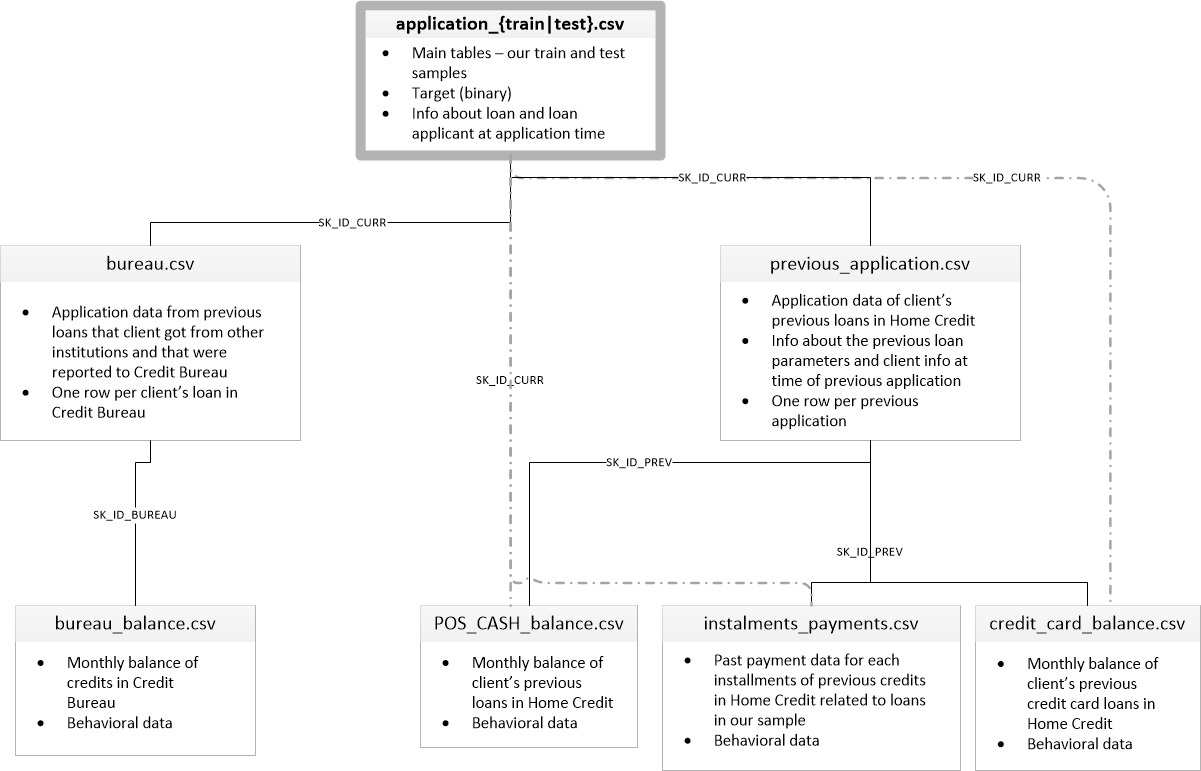

### Data Dictionary
``` 
HomeCredit_columns_description.csv
``` is a data dictionary of this dataset

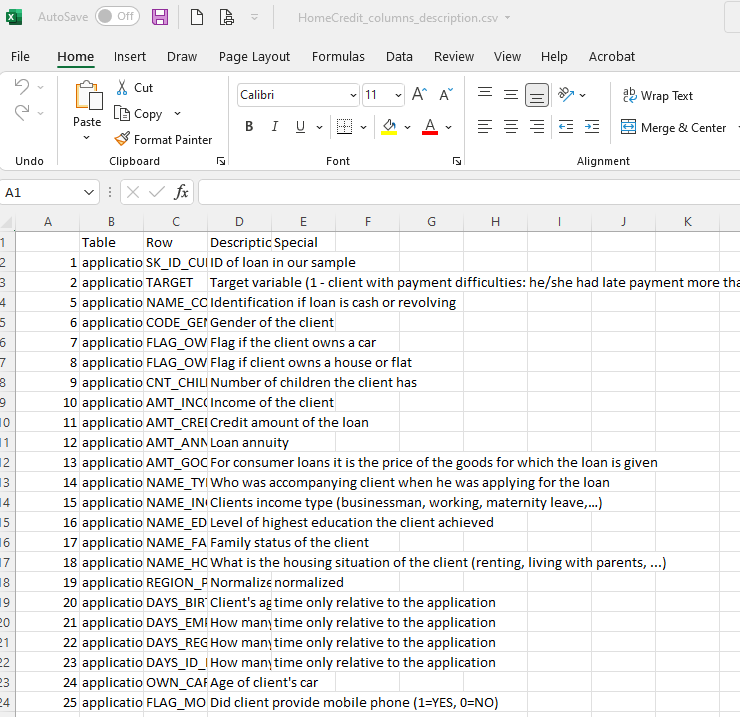

### Application train
* __application_train:__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.


In [4]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

def load_data(in_path, name):
    df = pd.read_csv(in_path)
    print(f"{name}: shape is {df.shape}")
    print(df.info())
    display(df.head(5))
    return df

DATA_DIR = "../data/home-credit-default-risk"
datasets={}  # lets store the datasets in a dictionary so we can keep track of them easily
ds_name = 'application_train'
datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)

datasets['application_train'].shape

application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

(307511, 122)

### Application test
* __application_test:__ has the same features as application_train, except TARGET column. Kaggle does not provide the TARGET column in the test file. It is used for scoring. 


In [2]:
ds_name = 'application_test'
datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)

application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

### Other tables
__bureau.csv__: This data file contains information regarding the borrower’s previous credit which was borrowed from other financial institutions and was reported to the Credit Bureau. It contains every detail of the number of credits the client previously had in the Credit Bureau before applying to loan at the Home Credit Group.

__bureau_balance.csv__: This dataset has information of borrower’s monthly credits in the previous credits. Every row in the data represents the history of previous credit reported to the Credit Bureau for every month.

__POS_CASH_balance.csv__: This data file contains monthly balance snapshots of cash loans that borrower had with Home Credit and previous point of sales. Each row has each month of history of every previous credit in Home Credit.

__credit_card_balance.csv__: This data file contains the snapshots of the history of credit cards that the borrower has with the Home credit. Each row has each month of history of every previous credit card in Home Credit.

__previous_application.csv__: This data file has all the applications that the borrower had applied for in the past.

__installments_payments.csv__: This data file has the history of the repayment that has been done for the disbursed amount in Home Credit. It has one row for every repayment that has been done and also the missed ones.

# Exploratory Data analysis

## Summary statistics of Application train/test

In [3]:
datasets["application_train"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [52]:
datasets["application_train"].info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [4]:
datasets["application_train"].describe() #numerical only features

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

In [5]:
datasets["application_test"].describe() #numerical only features

SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count   48744.000000  48744.000000      4.874400e+04  4.874400e+04   
mean   277796.676350      0.397054      1.784318e+05  5.167404e+05   
std    103169.547296      0.709047      1.015226e+05  3.653970e+05   
min    100001.000000      0.000000      2.694150e+04  4.500000e+04   
25%    188557.750000      0.000000      1.125000e+05  2.606400e+05   
50%    277549.000000      0.000000      1.575000e+05  4.500000e+05   
75%    367555.500000      1.000000      2.250000e+05  6.750000e+05   
max    456250.000000     20.000000      4.410000e+06  2.245500e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count   48720.000000     4.874400e+04                48744.000000   
mean    29426.240209     4.626188e+05                    0.021226   
std     16016.368315     3.367102e+05                    0.014428   
min      2295.000000     4.500000e+04                    0.000253   
25%     17973.000000     2.250000e+05                    0.010006   
50%     26199.000000     3.960000e+05                    0.018850   
75%     37390.500000     6.300000e+05                    0.028663   
max    180576.000000     2.245500e+06                    0.072508   

         DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  ...  FLAG_DOCUMENT_18  \
count  48744.000000   48744.000000       48744.000000  ...      48744.000000   
mean  -16068.084605   67485.366322       -4967.652716  ...          0.001559   
std     4325.900393  144348.507136        3552.612035  ...          0.039456   
min   -25195.000000  -17463.000000      -23722.000000  ...          0.000000   
25%   -19637.000000   -2910.000000       -7459.250000  ...          0.000000   
50%   -15785.000000   -1293.000000       -4490.000000  ...          0.000000   
75%   -12496.000000    -296.000000       -1901.000000  ...          0.000000   
max    -7338.000000  365243.000000           0.000000  ...          1.000000   

       FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count           48744.0           48744.0           48744.0   
mean                0.0               0.0               0.0   
std                 0.0               0.0               0.0   
min                 0.0               0.0               0.0   
25%                 0.0               0.0               0.0   
50%                 0.0               0.0               0.0   
75%                 0.0               0.0               0.0   
max                 0.0               0.0               0.0   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count                42695.000000               42695.000000   
mean                     0.002108                   0.001803   
std                      0.046373                   0.046132   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      2.000000                   2.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count                42695.000000               42695.000000   
mean                     0.002787                   0.009299   
std                      0.054037                   0.110924   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      2.000000                   6.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count               42695.000000                42695.000000  
mean                    0.546902                    1.983769  
std                     0.693305                    1.838873  
min                     0.000000                    0.000000  

In [6]:
datasets["application_train"].describe(include='all') #look at all categorical and numerical

SK_ID_CURR         TARGET NAME_CONTRACT_TYPE CODE_GENDER  \
count   307511.000000  307511.000000             307511      307511   
unique            NaN            NaN                  2           3   
top               NaN            NaN         Cash loans           F   
freq              NaN            NaN             278232      202448   
mean    278180.518577       0.080729                NaN         NaN   
std     102790.175348       0.272419                NaN         NaN   
min     100002.000000       0.000000                NaN         NaN   
25%     189145.500000       0.000000                NaN         NaN   
50%     278202.000000       0.000000                NaN         NaN   
75%     367142.500000       0.000000                NaN         NaN   
max     456255.000000       1.000000                NaN         NaN   

       FLAG_OWN_CAR FLAG_OWN_REALTY   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count        307511          307511  307511.000000      3.075110e+05   
unique            2               2            NaN               NaN   
top               N               Y            NaN               NaN   
freq         202924          213312            NaN               NaN   
mean            NaN             NaN       0.417052      1.687979e+05   
std             NaN             NaN       0.722121      2.371231e+05   
min             NaN             NaN       0.000000      2.565000e+04   
25%             NaN             NaN       0.000000      1.125000e+05   
50%             NaN             NaN       0.000000      1.471500e+05   
75%             NaN             NaN       1.000000      2.025000e+05   
max             NaN             NaN      19.000000      1.170000e+08   

          AMT_CREDIT    AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
count   3.075110e+05  307499.000000  ...     307511.000000    307511.000000   
unique           NaN            NaN  ...               NaN              NaN   
top              NaN            NaN  ...               NaN              NaN   
freq             NaN            NaN  ...               NaN              NaN   
mean    5.990260e+05   27108.573909  ...          0.008130         0.000595   
std     4.024908e+05   14493.737315  ...          0.089798         0.024387   
min     4.500000e+04    1615.500000  ...          0.000000         0.000000   
25%     2.700000e+05   16524.000000  ...          0.000000         0.000000   
50%     5.135310e+05   24903.000000  ...          0.000000         0.000000   
75%     8.086500e+05   34596.000000  ...          0.000000         0.000000   
max     4.050000e+06  258025.500000  ...          1.000000         1.000000   

       FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
count     307511.000000    307511.000000              265992.000000   
unique              NaN              NaN                        NaN   
top                 NaN              NaN                        NaN   
freq                NaN              NaN                        NaN   
mean           0.000507         0.000335                   0.006402   
std            0.022518         0.018299                   0.083849   
min            0.000000         0.000000                   0.000000   
25%            0.000000         0.000000                   0.000000   
50%            0.000000         0.000000                   0.000000   
75%            0.000000         0.000000                   0.000000   
max            1.000000         1.000000                   4.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
count              265992.000000               265992.000000   
unique                       NaN                         NaN   
top                          NaN                         NaN   
freq                         NaN                         NaN   
mean                    0.007000                    0.034362   
std                     0.110757                    0.204685   
min                     0.000000           

## Identify numerical and categorical features

In [12]:
application_train = datasets["application_train"]
numerical_ix = application_train.select_dtypes(include=['int64', 'float64']).columns
categorical_ix = application_train.select_dtypes(include=['object', 'bool']).columns
num_features = list(numerical_ix)
cat_features = list(categorical_ix)
print(f"# of numerical   features: {len(numerical_ix)}")
print(f"Numerical   features: {numerical_ix}")
print('--------')
print(f"# of categorical features: {len(categorical_ix)}")
print(f"Categorical features: {categorical_ix}")

# of numerical   features: 106
Numerical   features: Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=106)
--------
# of categorical features: 16
Categorical features: Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTAT

## Missing data for application train and test

### Application train

In [13]:
percent = (application_train.isnull().sum()/application_train.isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = application_train.isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Train_Missing_Count"])
missing_application_train_data.head(20)

missing_application_train_data = missing_application_train_data[(missing_application_train_data['Train_Missing_Count'] != 0)]

print("There are", len(list(missing_application_train_data.index.values)), "columns with missing values in the dataset, out of a total",len(num_features)+len(cat_features), "features" )

There are 67 columns with missing values in the dataset, out of a total 122 features


In [76]:
print("These are the columns with missing values:")

print(missing_application_train_data.to_string())

These are the columns with missing values:
                              Percent  Train_Missing_Count
COMMONAREA_MEDI                 69.87               214865
COMMONAREA_AVG                  69.87               214865
COMMONAREA_MODE                 69.87               214865
NONLIVINGAPARTMENTS_MODE        69.43               213514
NONLIVINGAPARTMENTS_AVG         69.43               213514
NONLIVINGAPARTMENTS_MEDI        69.43               213514
FONDKAPREMONT_MODE              68.39               210295
LIVINGAPARTMENTS_MODE           68.35               210199
LIVINGAPARTMENTS_AVG            68.35               210199
LIVINGAPARTMENTS_MEDI           68.35               210199
FLOORSMIN_AVG                   67.85               208642
FLOORSMIN_MODE                  67.85               208642
FLOORSMIN_MEDI                  67.85               208642
YEARS_BUILD_MEDI                66.50               204488
YEARS_BUILD_MODE                66.50               204488
YEARS_BUILD_A

In [14]:
col_with_na = list(missing_application_train_data.index.values)

## temporarily remove columns with nan values -- until imputing is done on each of the 67 features -- store in new df
app_train_data = application_train.loc[:, ~application_train.columns.isin(col_with_na)]

### Application test

In [66]:
application_test = datasets["application_test"]
percent = (application_test.isnull().sum()/application_test.isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = application_test.isna().sum().sort_values(ascending = False)
missing_application_test_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Test_Missing_Count"])
missing_application_test_data.head(20)

missing_application_test_data = missing_application_test_data[(missing_application_test_data['Test_Missing_Count'] != 0)]
print("There are", len(list(missing_application_test_data.index.values)), "columns with missing values in the dataset, out of a total",application_test.shape[1], "features" )

There are 64 columns with missing values in the dataset, out of a total 121 features


In [67]:
print("These are the columns with missing values:")

print(missing_application_test_data.to_string())

These are the columns with missing values:
                              Percent  Test_Missing_Count
COMMONAREA_AVG                  68.72               33495
COMMONAREA_MODE                 68.72               33495
COMMONAREA_MEDI                 68.72               33495
NONLIVINGAPARTMENTS_AVG         68.41               33347
NONLIVINGAPARTMENTS_MODE        68.41               33347
NONLIVINGAPARTMENTS_MEDI        68.41               33347
FONDKAPREMONT_MODE              67.28               32797
LIVINGAPARTMENTS_AVG            67.25               32780
LIVINGAPARTMENTS_MODE           67.25               32780
LIVINGAPARTMENTS_MEDI           67.25               32780
FLOORSMIN_MEDI                  66.61               32466
FLOORSMIN_AVG                   66.61               32466
FLOORSMIN_MODE                  66.61               32466
OWN_CAR_AGE                     66.29               32312
YEARS_BUILD_AVG                 65.28               31818
YEARS_BUILD_MEDI             

## Distribution of the target column

In [22]:
datasets["application_train"]['TARGET'].astype(int).plot.hist();
plt.title("Distribution of the target column",fontsize=20)
plt.xlabel('Target Variable (0 - paid, 1 - default)')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

In [12]:
datasets["application_train"]['TARGET'].value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

The TARGET colunm has 92% of value 0 and 8% of value 1. This is an imbalance target columm. 

## Distribution of the AMT_ANNUITY column
The AMT_ANNUITY column looks skewed to the right. After using log transformation, it looks better

Text(0, 0.5, 'Count')

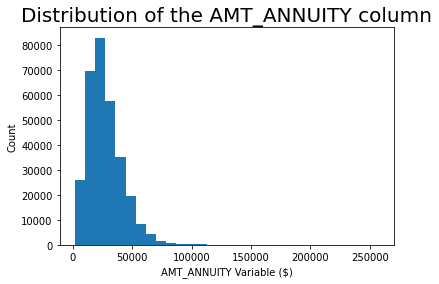

In [20]:
plt.hist(datasets["application_train"]['AMT_ANNUITY'], bins=30);
plt.title("Distribution of the AMT_ANNUITY column",fontsize=20)
plt.xlabel('AMT_ANNUITY Variable ($)')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

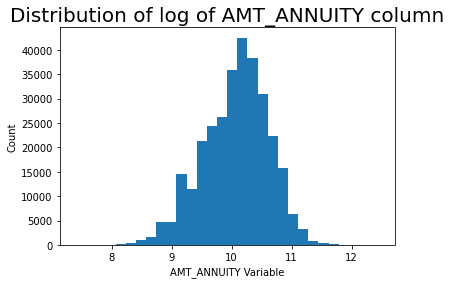

In [21]:
plt.hist(np.log(datasets["application_train"]['AMT_ANNUITY']), bins=30);
plt.title("Distribution of log of AMT_ANNUITY column",fontsize=20)
plt.xlabel('AMT_ANNUITY Variable')
plt.ylabel('Count')

## Correlation with  the target column 

In [15]:
correlations = datasets["application_train"].corr()['TARGET'].sort_values()
print('Most Positive Correlations:\n', correlations.tail(10))
print('\nMost Negative Correlations:\n', correlations.head(10))
#print(correlations[abs(correlations.values)<0.01])

Most Positive Correlations:
 FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
Name: TARGET, dtype: float64


## Applicants occupations

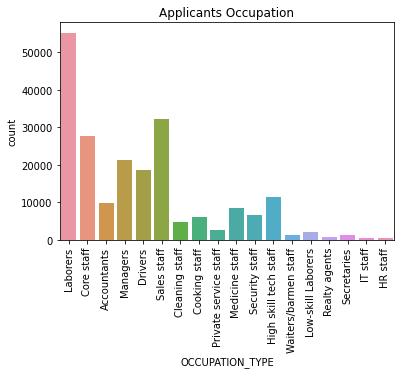

In [17]:
sns.countplot(x='OCCUPATION_TYPE', data=datasets["application_train"]);
plt.title('Applicants Occupation');
plt.xticks(rotation=90);

## Visual EDA of HCDR data

### Correlation Analysis of input features

[Text(0.5, 1.0, 'Correlation Matrix of Input Features')]

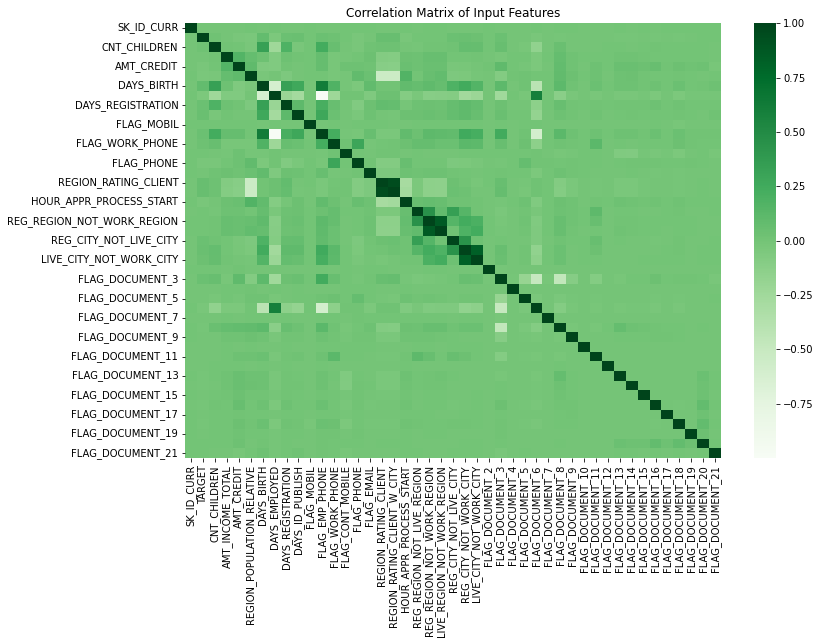

In [79]:
## start correlation analysis with numerical columns -- that have all values present

##find correlation matrix for numerical features of new dataframe
corr = app_train_data[list(app_train_data.select_dtypes(include=['int64', 'float64']).columns)].corr()

#kot = corr[corr>=.8]
plt.figure(figsize=(12,8))
chart=sns.heatmap(corr, cmap="Greens") 
chart.set(title="Correlation Matrix of Input Features")

#### Pairplots of input features

Home Credit Default Risk Dataset: 0 for loan repaid and 1 for loan unpaid.
Pairplot of features:  ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE'] w.r.t. to TARGET variable


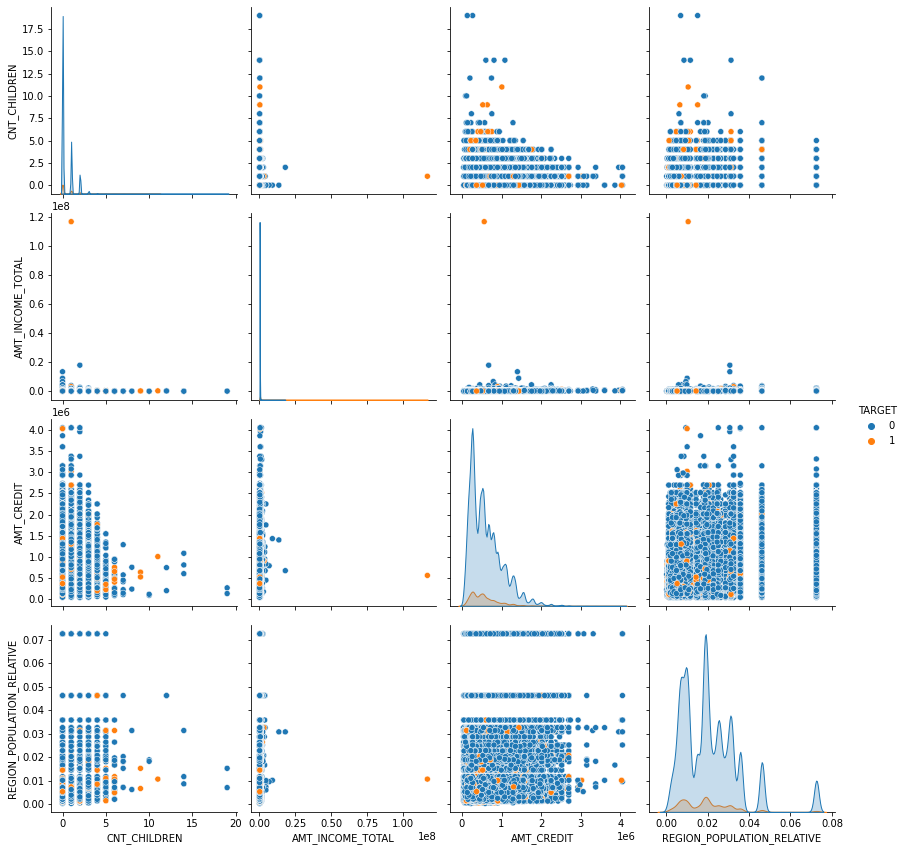

In [81]:
num_features_sub = list(app_train_data.select_dtypes(include=['int64', 'float64']).columns)
num_features_sub = num_features_sub[2:] ##remove SKU and TARGET columns ()
cat_features_sub = list(app_train_data.select_dtypes(include=['object', 'bool']).columns)

print("Home Credit Default Risk Dataset: 0 for loan repaid and 1 for loan unpaid.")

print("Pairplot of features: ", num_features_sub[0:4], "w.r.t. to TARGET variable")

sns.pairplot(data = app_train_data, hue="TARGET", vars = num_features_sub[0:4], height=3)

In [82]:
##standardize DAYS variables to year
app_train_data["DAYS_BIRTH"] = app_train_data["DAYS_BIRTH"]/-365
app_train_data["DAYS_EMPLOYED"] = app_train_data["DAYS_EMPLOYED"]/-365 ##55,374 entries with value = '365243' <--- impute to median/mean
app_train_data["DAYS_EMPLOYED"] = np.where(app_train_data["DAYS_EMPLOYED"] == 365243/-365, 
                                           app_train_data["DAYS_EMPLOYED"].median(), app_train_data["DAYS_EMPLOYED"])

app_train_data["DAYS_REGISTRATION"] = app_train_data["DAYS_REGISTRATION"]/-365
app_train_data["DAYS_ID_PUBLISH"] = app_train_data["DAYS_ID_PUBLISH"]/-365

attr = num_features_sub[4:8]
print("Pairplot of features: ", attr, "w.r.t. to TARGET variable")
sns.pairplot(data = app_train_data, hue="TARGET", vars = attr, height=3)

Pairplot of features:  ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH'] w.r.t. to TARGET variable


In [83]:
ttr = num_features_sub[8:12]
print("Pairplot of features: ", attr, "w.r.t. to TARGET variable")
sns.pairplot(data = app_train_data, hue="TARGET", vars = attr, height=3)

Pairplot of features:  ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH'] w.r.t. to TARGET variable


Pairplot of features:  ['FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY'] w.r.t. to TARGET variable


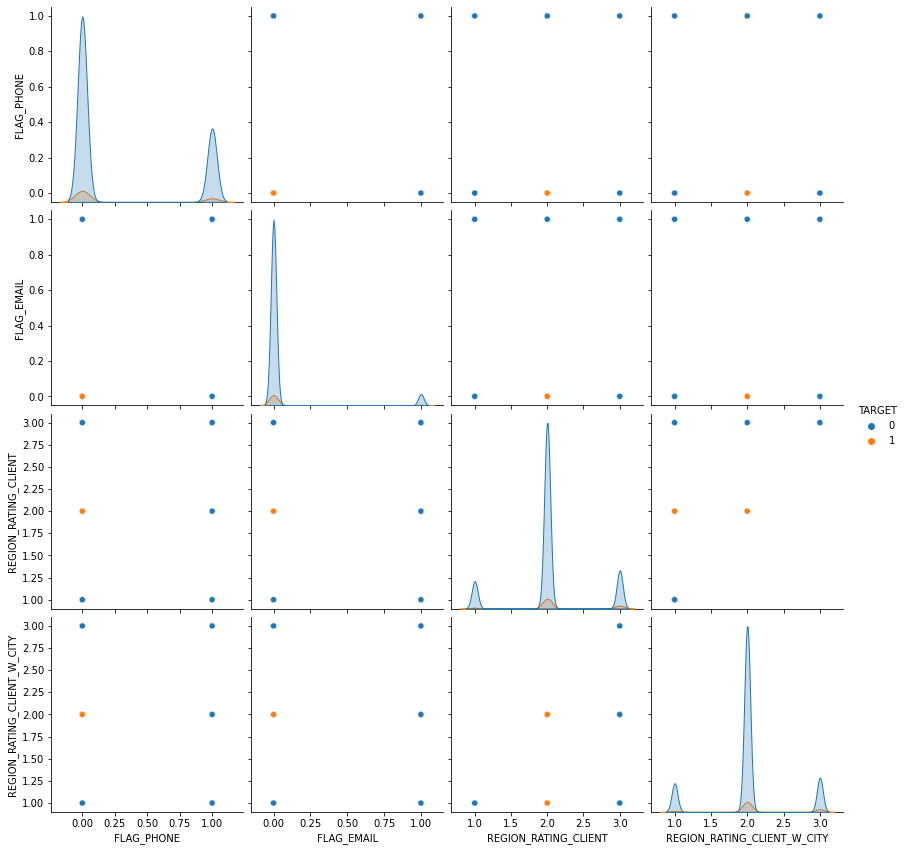

In [84]:
attr = num_features_sub[12:16]
print("Pairplot of features: ", attr, "w.r.t. to TARGET variable")
sns.pairplot(data = app_train_data, hue="TARGET", vars = attr, height=3)

Pairplot of features:  ['HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION'] w.r.t. to TARGET variable


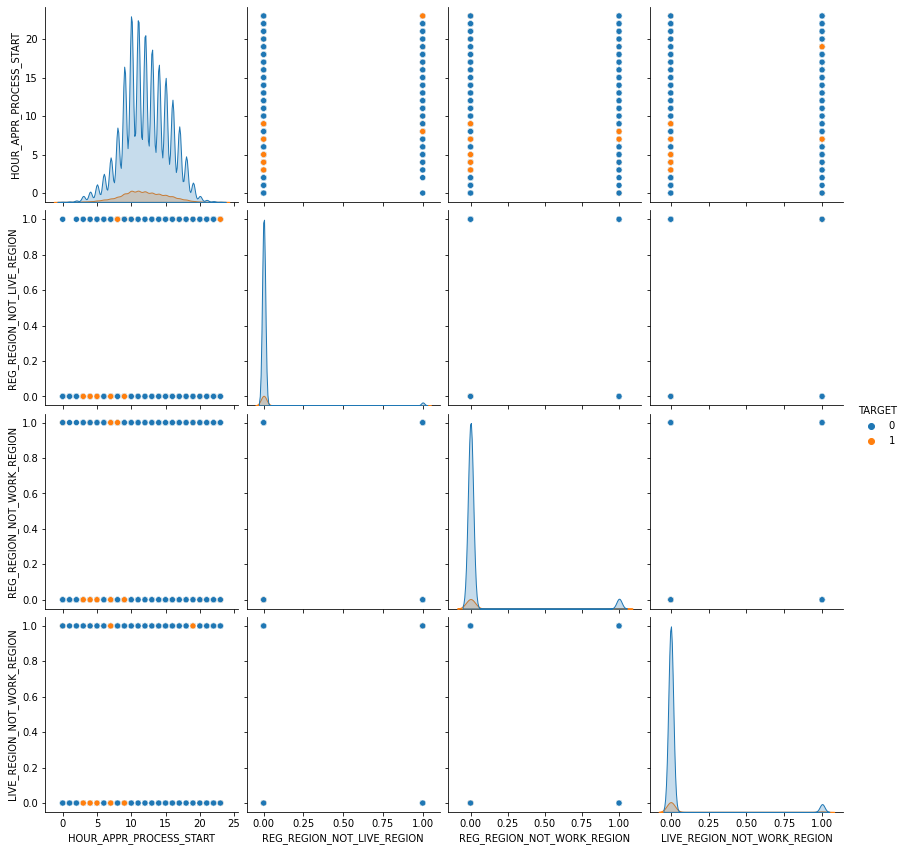

In [85]:
attr = num_features_sub[16:20]
print("Pairplot of features: ", attr, "w.r.t. to TARGET variable")
sns.pairplot(data = app_train_data, hue="TARGET", vars = attr, height=3)

Pairplot of features:  ['REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2'] w.r.t. to TARGET variable


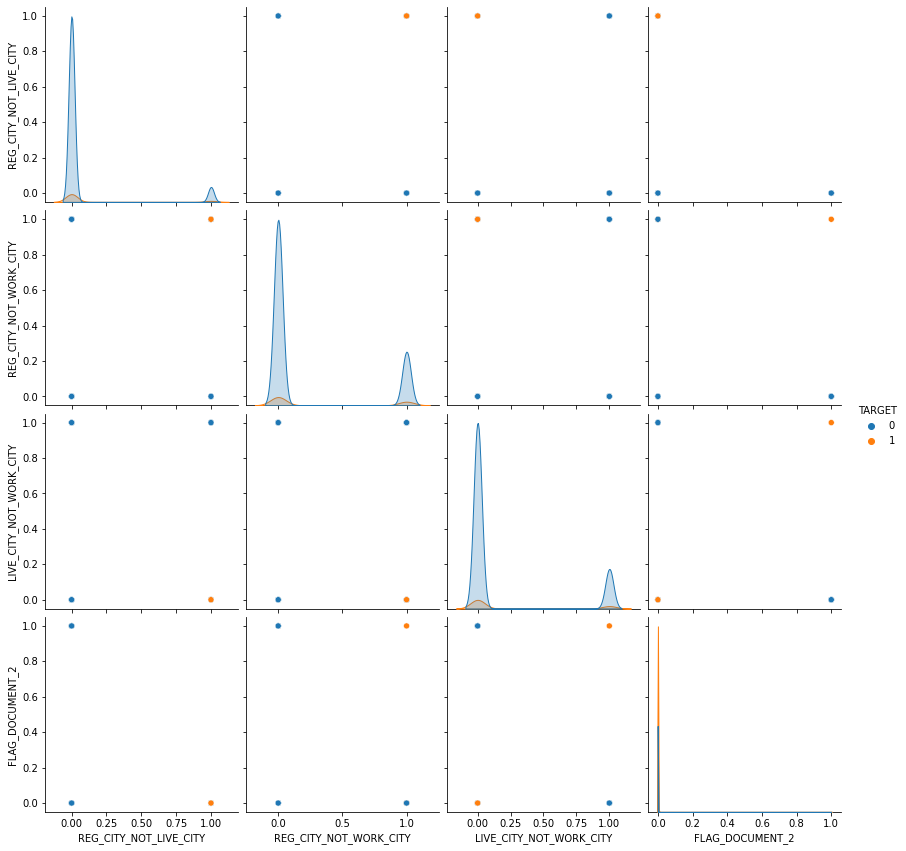

In [86]:
attr = num_features_sub[20:24]
print("Pairplot of features: ", attr, "w.r.t. to TARGET variable")
sns.pairplot(data = app_train_data, hue="TARGET", vars = attr, height=3)

In [87]:
attr = num_features_sub[24:28]
print("Pairplot of features: ", attr, "w.r.t. to TARGET variable")
sns.pairplot(data = app_train_data, hue="TARGET", vars = attr, height=3)

Pairplot of features:  ['FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6'] w.r.t. to TARGET variable


Pairplot of features:  ['FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10'] w.r.t. to TARGET variable


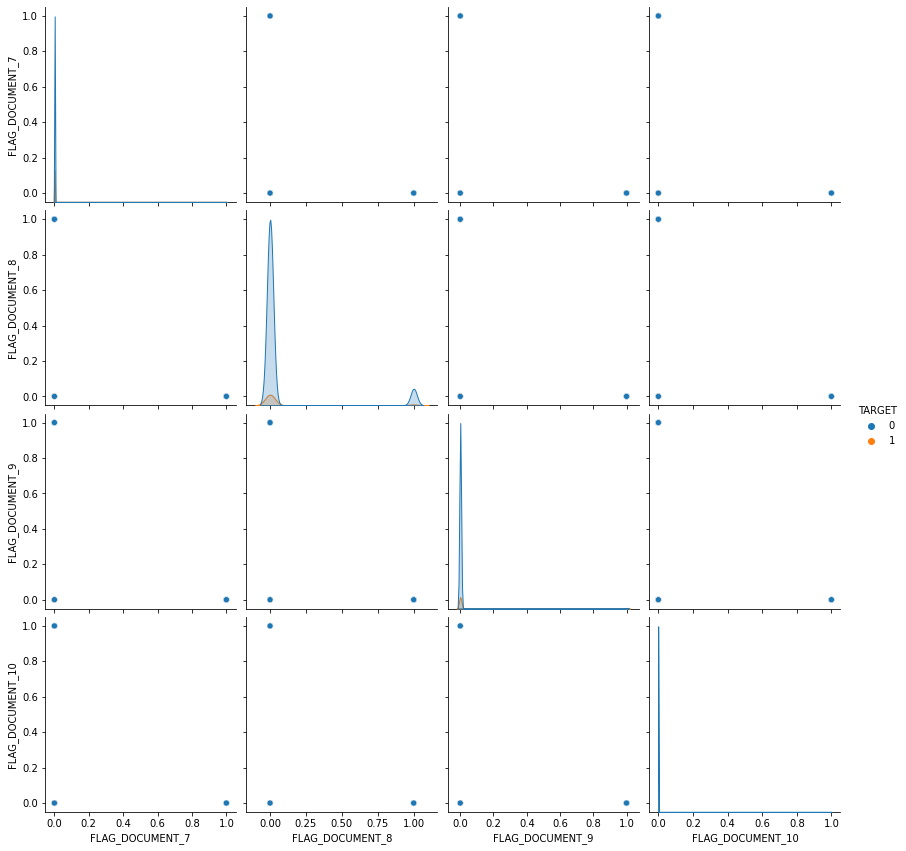

In [88]:
attr = num_features_sub[28:32]
print("Pairplot of features: ", attr, "w.r.t. to TARGET variable")
sns.pairplot(data = app_train_data, hue="TARGET", vars = attr, height=3)

Pairplot of features:  ['FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14'] w.r.t. to TARGET variable


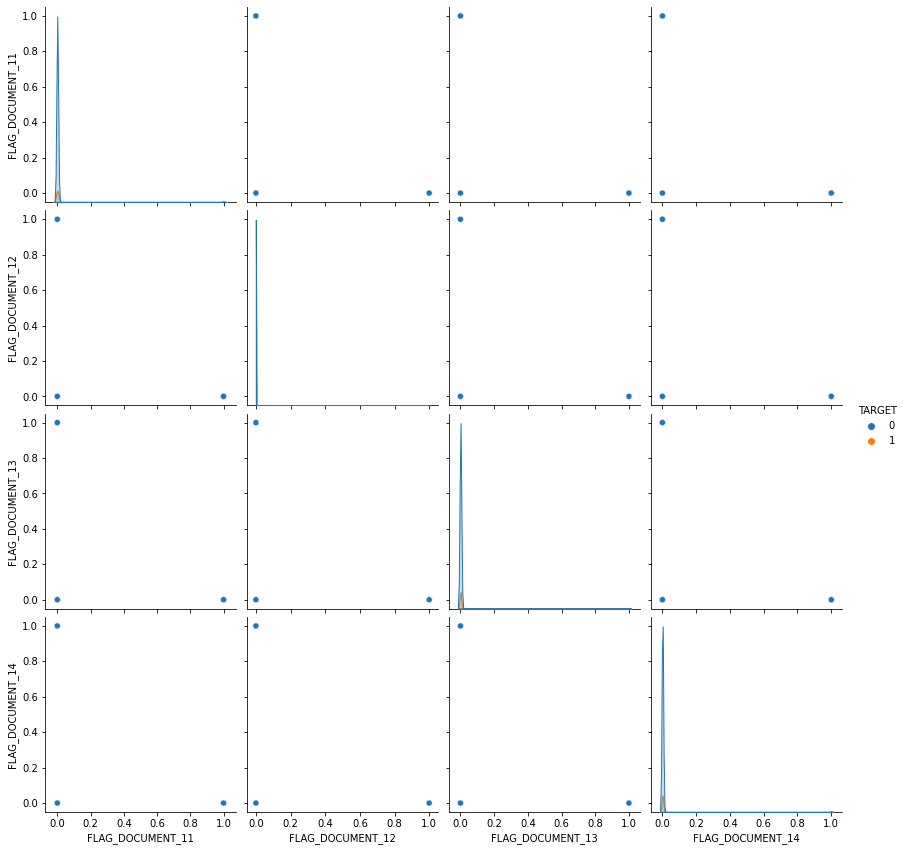

In [89]:
attr = num_features_sub[32:36]
print("Pairplot of features: ", attr, "w.r.t. to TARGET variable")
sns.pairplot(data = app_train_data, hue="TARGET", vars = attr, height=3)

Pairplot of features:  ['FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18'] w.r.t. to TARGET variable


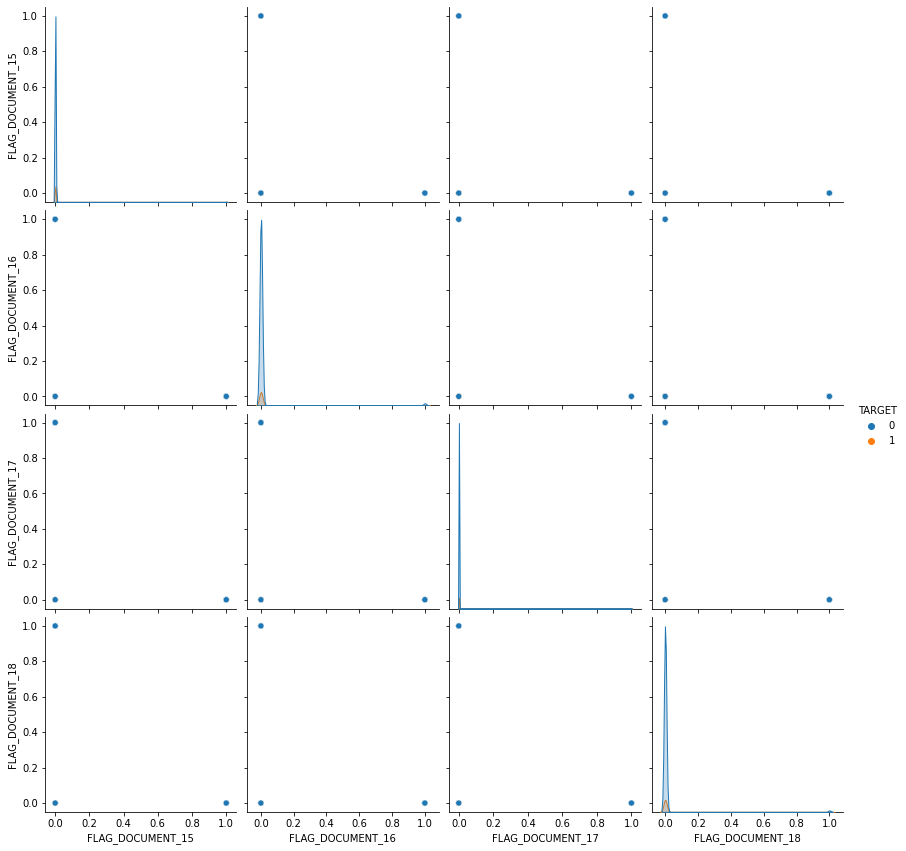

In [90]:
attr = num_features_sub[36:40]
print("Pairplot of features: ", attr, "w.r.t. to TARGET variable")
sns.pairplot(data = app_train_data, hue="TARGET", vars = attr, height=3)

Pairplot of features:  ['FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'] w.r.t. to TARGET variable


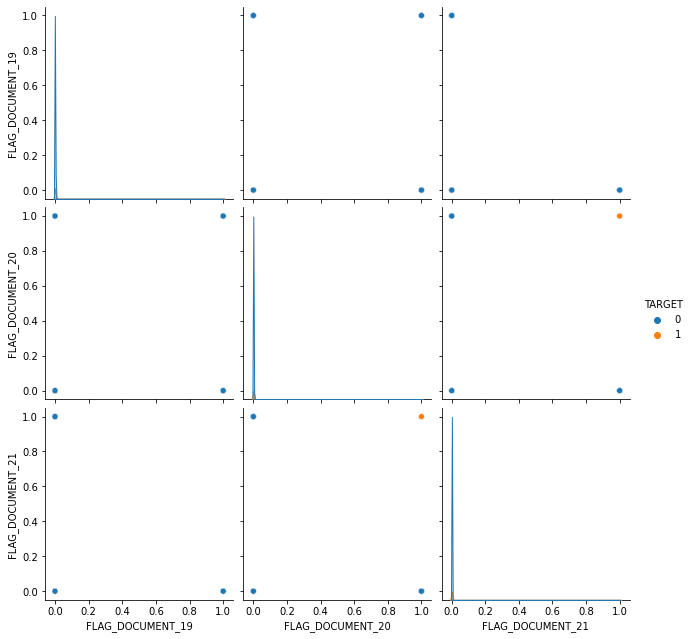

In [91]:
attr = num_features_sub[40:44]
print("Pairplot of features: ", attr, "w.r.t. to TARGET variable")
sns.pairplot(data = app_train_data, hue="TARGET", vars = attr, height=3)

In [93]:
len(cat_features_sub)

10

__All categorical features w.r.t. to Target variable__

In [94]:
##all categorical features w.r.t. to Target variable

plt.figure(figsize=(25,4))
for idx, cat in enumerate(cat_features_sub[:4]):
    plt.subplot(1, 5, idx+1)
    chart = sns.countplot(app_train_data[cat], hue=app_train_data['TARGET'])
    title="Target Variable by "+cat
    chart.set(title=title)

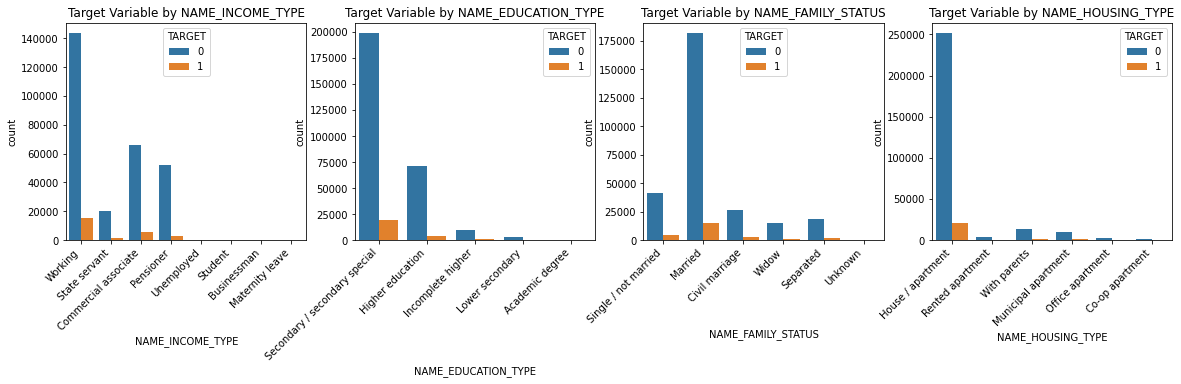

In [95]:
plt.figure(figsize=(25,4))
for idx, cat in enumerate(cat_features_sub[4:8]):
    plt.subplot(1, 5, idx+1)
    chart = sns.countplot(app_train_data[cat], hue=app_train_data['TARGET'])
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
    title="Target Variable by "+cat
    chart.set(title=title)

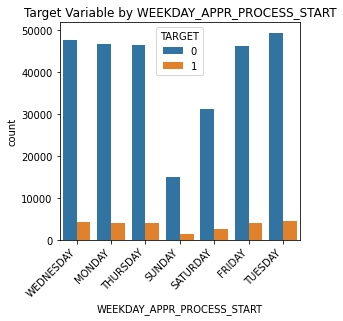

In [96]:
plt.figure(figsize=(25,4))
for idx, cat in enumerate(cat_features_sub[8:9]):
    plt.subplot(1, 5, idx+1)
    chart = sns.countplot(app_train_data[cat], hue=app_train_data['TARGET'])
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
    title="Target Variable by "+cat
    chart.set(title=title)

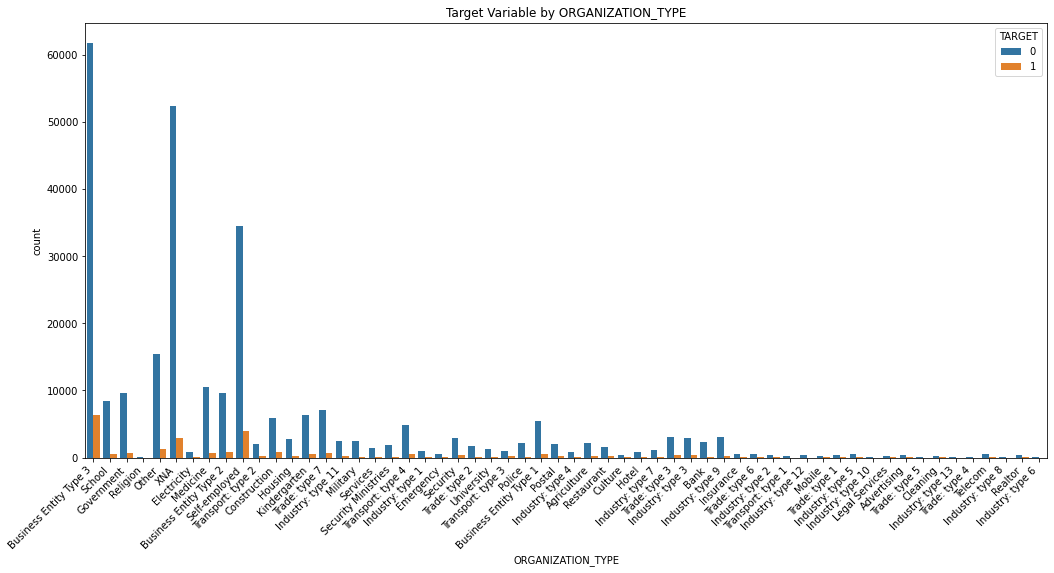

In [97]:
plt.figure(figsize=(100,8))
for idx, cat in enumerate(cat_features_sub[9:]):
    plt.subplot(1, 5, idx+1)
    chart = sns.countplot(app_train_data[cat], hue=app_train_data['TARGET'])
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
    title="Target Variable by "+cat
    chart.set(title=title)

### Visualize columns with most missing values

In [98]:
missing_application_train_data

Percent  Train_Missing_Count
COMMONAREA_MEDI             69.87               214865
COMMONAREA_AVG              69.87               214865
COMMONAREA_MODE             69.87               214865
NONLIVINGAPARTMENTS_MODE    69.43               213514
NONLIVINGAPARTMENTS_AVG     69.43               213514
...                           ...                  ...
EXT_SOURCE_2                 0.21                  660
AMT_GOODS_PRICE              0.09                  278
AMT_ANNUITY                  0.00                   12
CNT_FAM_MEMBERS              0.00                    2
DAYS_LAST_PHONE_CHANGE       0.00                    1

[67 rows x 2 columns]

In [99]:
#missing_application_train_data.plot.barh(x=list(missing_application_train_data.index.values), y='Train_Missing_Count')

missing_data = pd.DataFrame(
    {"counts": missing_application_train_data['Train_Missing_Count']})

missing_data.head()

counts
COMMONAREA_MEDI           214865
COMMONAREA_AVG            214865
COMMONAREA_MODE           214865
NONLIVINGAPARTMENTS_MODE  213514
NONLIVINGAPARTMENTS_AVG   213514

In [100]:
##summary of missing values

fig = plt.figure(figsize=(50,15))
ax = fig.add_axes([0,0,1,1])

ax.bar(col_with_na,missing_application_train_data['Train_Missing_Count'])
plt.xticks(rotation = 90, fontsize=35)
plt.yticks(fontsize=35)
### add title here
plt.title("Features with most missing values",fontsize=60)
plt.show()

In [119]:
application_default_data=app_train_data[app_train_data["TARGET"]==1]

### Others

Text(0, 0.5, 'Count')

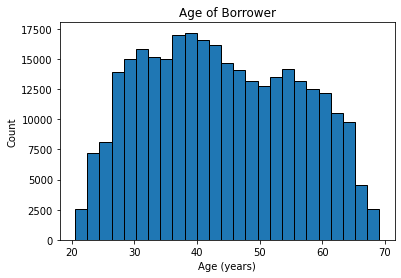

In [15]:
plt.hist(app_train_data['DAYS_BIRTH'] / -365, edgecolor = 'k', bins=25)
plt.title('Age of Borrower')
plt.xlabel('Age (years)')
plt.ylabel('Count')

[Text(0.5, 1.0, 'Distribution of Loan Amount by Loan Type and Default Status: 0 or 1')]

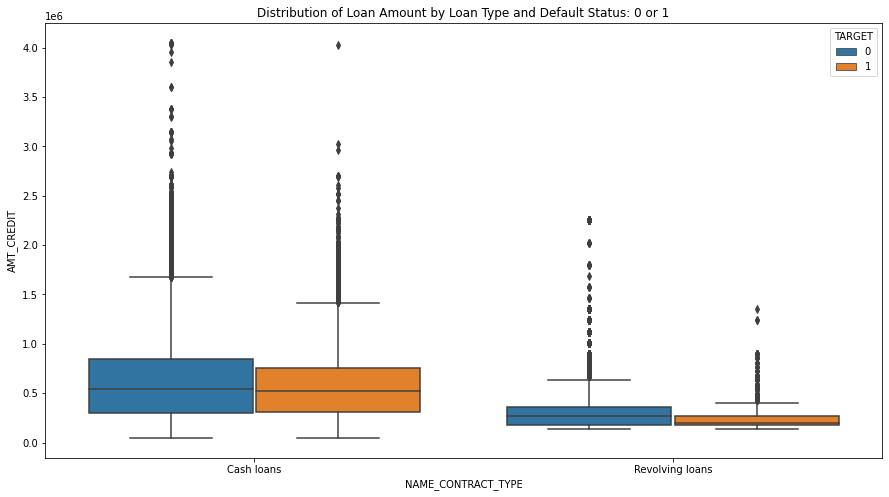

In [103]:
#chart=sns.catplot(x="NAME_CONTRACT_TYPE", y="AMT_CREDIT", hue="TARGET", kind="box", data=app_train_data)
plt.figure(figsize=(15,8))
#sns.catplot(x="NAME_CONTRACT_TYPE", y="AMT_CREDIT", hue="TARGET", kind="box", data=app_train_data)

title="Distribution of Loan Amount by Loan Type and Default Status: 0 or 1"
#chart.set(title=title)
#plt.title(title,fontsize=12,loc='right')


ax = sns.boxplot(x="NAME_CONTRACT_TYPE", y="AMT_CREDIT", hue="TARGET", data=app_train_data)
ax.set(title=title)

In [104]:
app_train_data[app_train_data["TARGET"]==1]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
26          100031       1         Cash loans           F            N   
40          100047       1         Cash loans           M            N   
42          100049       1         Cash loans           F            N   
81          100096       1         Cash loans           F            N   
...            ...     ...                ...         ...          ...   
307448      456186       1         Cash loans           M            N   
307475      456215       1         Cash loans           F            N   
307481      456225       1         Cash loans           M            N   
307489      456233       1         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
26                   Y             0          112500.0    979992.0   
40                   Y             0          202500.0   1193580.0   
42                   N             0          135000.0    288873.0   
81                   Y             0           81000.0    252000.0   
...                ...           ...               ...         ...   
307448               N             1          207000.0    450000.0   
307475               N             1          144000.0   1303200.0   
307481               Y             0          225000.0    297000.0   
307489               Y             0          225000.0    521280.0   
307509               Y             0          171000.0    370107.0   

            NAME_INCOME_TYPE  ... FLAG_DOCUMENT_12 FLAG_DOCUMENT_13  \
0                    Working  ...                0                0   
26                   Working  ...                0                0   
40      Commercial associate  ...                0                0   
42                   Working  ...                0                0   
81                 Pensioner  ...                0                0   
...                      ...  ...              ...              ...   
307448               Working  ...                0                0   
307475               Working  ...                0                0   
307481               Working  ...                0                0   
307489  Commercial associate  ...                0                0   
307509  Commercial associate  ...                0                0   

       FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  \
0                     0                 0                 0                 0   
26                    0                 0                 1                 0   
40                    0                 0                 0                 0   
42                    0                 0                 0                 0   
81                    0                 0                 0                 0   
...                 ...               ...               ...               ...   
307448                0                 0                 0                 0   
307475                0                 0                 0                 0   
307481                0                 0                 0                 0   
307489                0                 0                 0                 0   
307509                0                 0                 0                 0   

        FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  
0                      0                 0                 0                 0  
26                     0                 0                 0                 0  
40                     0                 0                 0                 0  
42                     0                 0                 0                 0  
81                     0                 0     

__EDA of unpaid loans__

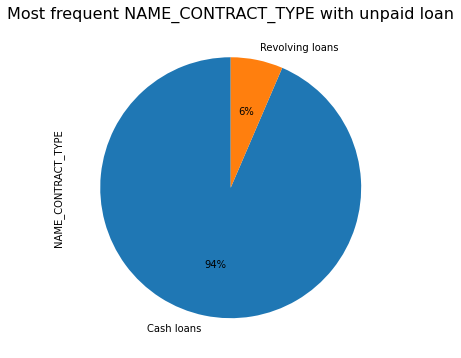

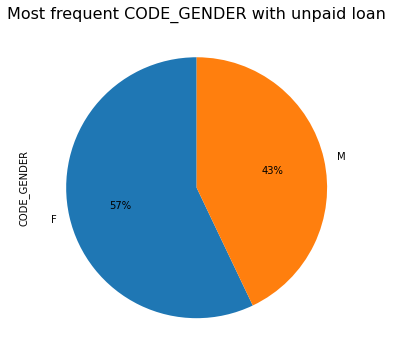

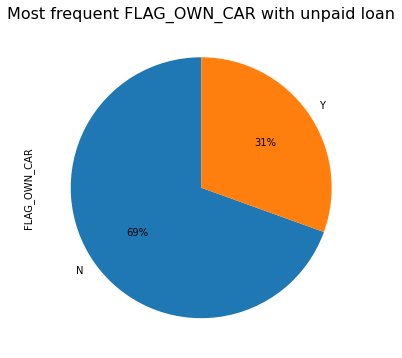

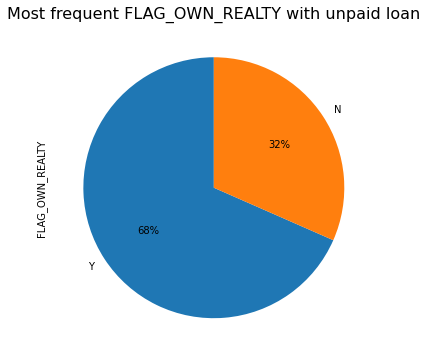

In [120]:
for i in cat_features_sub[0:4]:
    plt.figure(figsize=(8,6))
    application_default_data[i].value_counts(normalize=True).plot.pie(autopct='%1.0f%%', startangle=90)
    title = "Most frequent "+i+" with unpaid loan"
    plt.title(title,fontsize=16)

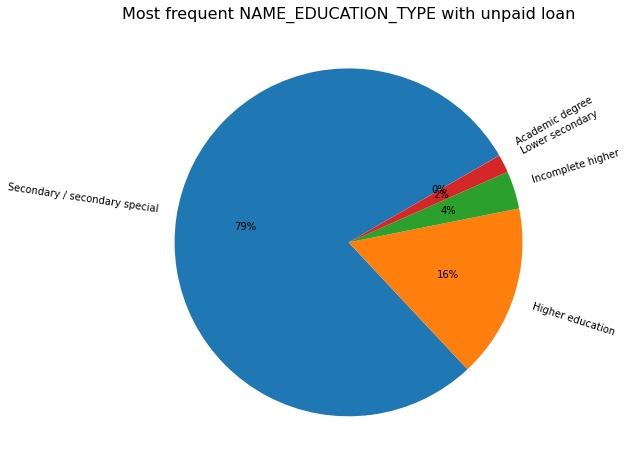

In [121]:
for i in cat_features_sub[5:6]:
    plt.figure(figsize=(10,8))
    application_default_data[i].value_counts(normalize=True).plot.pie(autopct='%1.0f%%', startangle=30, rotatelabels='true')
    title = "Most frequent "+i+" with unpaid loan"
    plt.title(title,fontsize=16)
    ax = plt.gca()
    ax.axes.yaxis.set_visible(False)
#, rotatelabels='false'

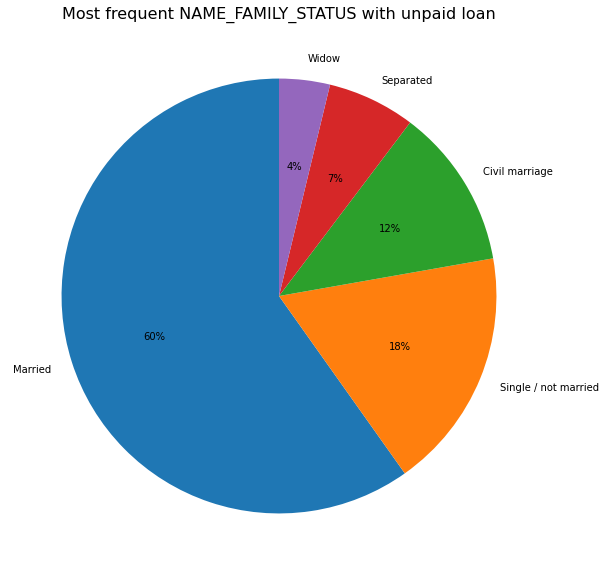

In [122]:
for i in cat_features_sub[6:7]:
    plt.figure(figsize=(10,10))
    application_default_data[i].value_counts(normalize=True).plot.pie(autopct='%1.0f%%', startangle=90)
    title = "Most frequent "+i+" with unpaid loan"
    plt.title(title,fontsize=16)
    ax = plt.gca()
    ax.axes.yaxis.set_visible(False)

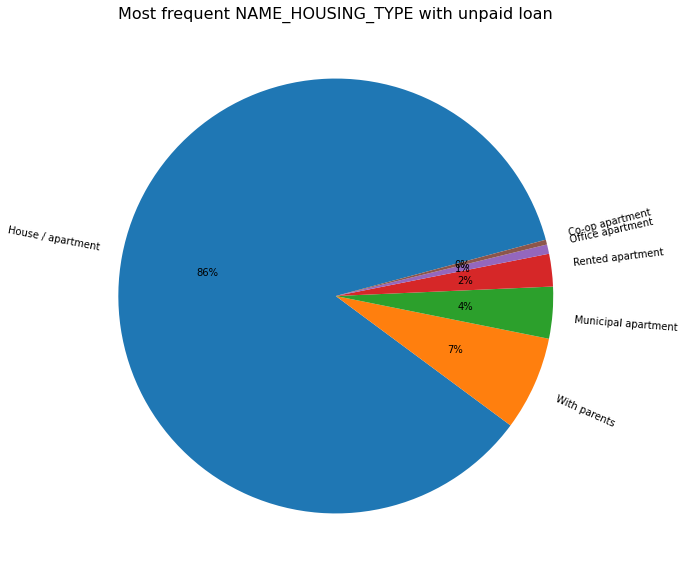

In [123]:
for i in cat_features_sub[7:8]:
    plt.figure(figsize=(10,10))
    application_default_data[i].value_counts(normalize=True).plot.pie(autopct='%1.0f%%', startangle=15, rotatelabels='true')
    title = "Most frequent "+i+" with unpaid loan"
    plt.title(title,fontsize=16)
    ax = plt.gca()
    ax.axes.yaxis.set_visible(False)

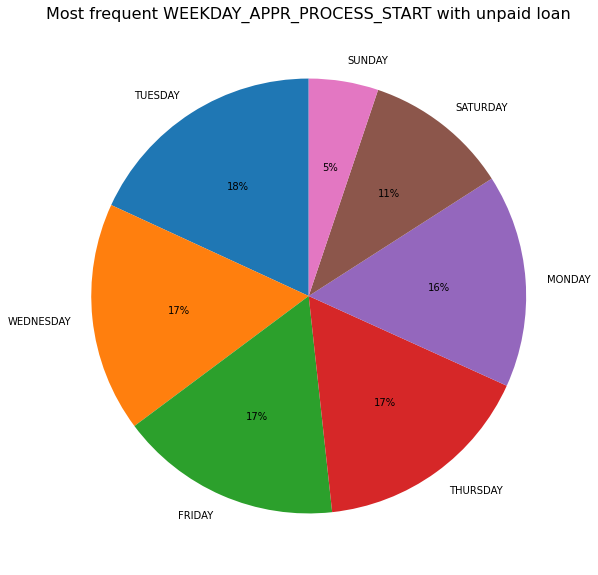

In [124]:
for i in cat_features_sub[8:9]:
    plt.figure(figsize=(10,10))
    application_default_data[i].value_counts(normalize=True).plot.pie(autopct='%1.0f%%', startangle=90)
    title = "Most frequent "+i+" with unpaid loan"
    plt.title(title,fontsize=16)
    ax = plt.gca()
    ax.axes.yaxis.set_visible(False)

Text(0.5, 1.0, 'Most frequent NAME_INCOME_TYPE with unpaid loan')

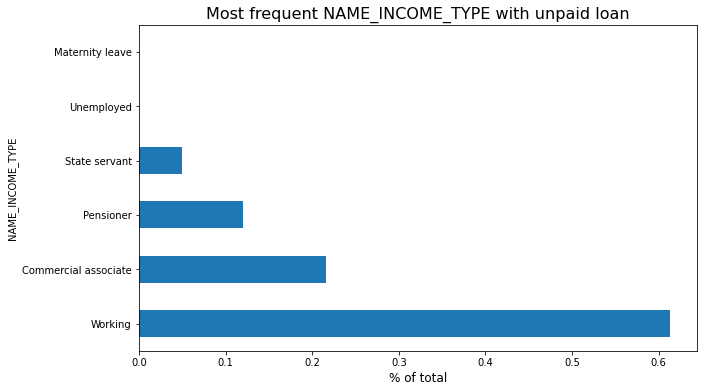

In [125]:
plt.figure(figsize=(10,6))
application_default_data[cat_features_sub[4]].value_counts(normalize=True).plot(kind='barh') 
title = "Most frequent "+cat_features_sub[4]+" with unpaid loan"
plt.ylabel(cat_features_sub[4],fontsize=10)
plt.xlabel("% of total",fontsize=12)
plt.title(title,fontsize=16)

Text(0.5, 1.0, 'Most frequent ORGANIZATION_TYPE with unpaid loan')

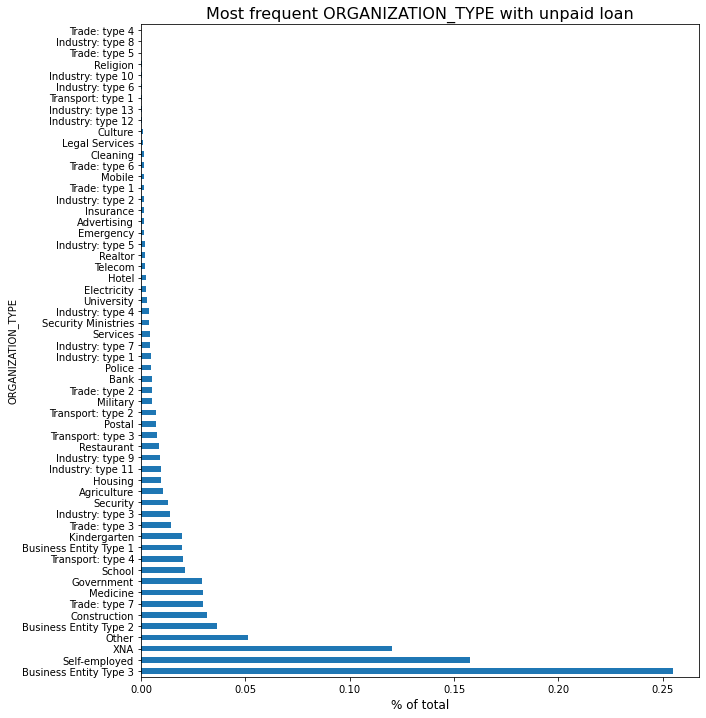

In [126]:
plt.figure(figsize=(10,12))
application_default_data[cat_features_sub[9]].value_counts(normalize=True).plot(kind='barh') 
title = "Most frequent "+cat_features_sub[9]+" with unpaid loan"
plt.ylabel(cat_features_sub[9],fontsize=10)
plt.xlabel("% of total",fontsize=12)
plt.title(title,fontsize=16)

## Split train, validation and test sets


In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

data = datasets["application_train"]
y = data['TARGET']
X = data.drop(['SK_ID_CURR', 'TARGET'], axis = 1) #drop some features with questionable value

# Split the provided training data into training and validationa and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")

X train           shape: (209107, 120)
X validation      shape: (52277, 120)
X test            shape: (46127, 120)


# Baseline models

## Baseline model (Baseline1)
Logistic regression is used for the baseline model. We take all features of the application_train dataset for the model. We spit numerical and categorial features and use pineline for this model. The identification and target features are removed out of our model.


In [20]:
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from time import time
from sklearn.model_selection import train_test_split  # sklearn.cross_validation in old versions
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score


data = datasets["application_train"]
y = data['TARGET']
X = data.drop(['SK_ID_CURR', 'TARGET'], axis = 1) #drop some features with questionable value

# Split the provided training data into training and validationa and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")

# Identify the numeric features we wish to consider. 

numerical_features = ['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE',
                      'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','OWN_CAR_AGE','CNT_FAM_MEMBERS',
                      'HOUR_APPR_PROCESS_START','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3',
                      'APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG','YEARS_BUILD_AVG','COMMONAREA_AVG',
                      'ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG','FLOORSMIN_AVG','LANDAREA_AVG','LIVINGAPARTMENTS_AVG',
                      'LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG',
                      'APARTMENTS_MODE','BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE',
                      'COMMONAREA_MODE','ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMAX_MODE','FLOORSMIN_MODE',
                      'LANDAREA_MODE','LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE',
                      'APARTMENTS_MEDI','BASEMENTAREA_MEDI','YEARS_BEGINEXPLUATATION_MEDI','YEARS_BUILD_MEDI',
                      'COMMONAREA_MEDI','ELEVATORS_MEDI','ENTRANCES_MEDI','FLOORSMAX_MEDI','FLOORSMIN_MEDI',
                      'LANDAREA_MEDI','LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI','NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MEDI',
                      'TOTALAREA_MODE','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE',
                      'DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE',
                      'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
                      'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR'
]


num_pipeline =Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])
                

# Identify the categorical features we wish to consider.
categorical_features = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE',
                        'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE',
                        'FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','OCCUPATION_TYPE','REGION_RATING_CLIENT',
                        'REGION_RATING_CLIENT_W_CITY','WEEKDAY_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',
                        'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
                        'HOUSETYPE_MODE','EMERGENCYSTATE_MODE','WALLSMATERIAL_MODE',
                        'FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6',
                        'FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11',
                        'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16',
                        'FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21'                        

]

# Create a pipelne for the categorical features.
# Entries with missing values or values that don't exist in the range
# defined above will be one hot encoded as zeroes.
cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])


data_pipeline = ColumnTransformer(transformers=[
        ("num_pipeline", num_pipeline, numerical_features),
        ("cat_pipeline", cat_pipeline, categorical_features)],
        remainder='drop',
        n_jobs=-1
    )


X_train_transformed = data_pipeline.fit_transform(X_train)
column_names = numerical_features  + \
               list(data_pipeline.transformers_[1][1].named_steps["ohe"].get_feature_names(categorical_features)) 
display(pd.DataFrame(X_train_transformed,  columns=column_names).head())
number_of_inputs = X_train_transformed.shape[1]
# Now we can combine this preprocessing step based on the ColumnTransformer with a
# classifier in a Pipeline to predict whether passengers of the Titanic survived or not:
clf_pipe1 = make_pipeline(
    data_pipeline,
    LogisticRegression())
# Time and score test predictions
start = time()
clf_pipe1.fit(X_train, y_train)
train_time = np.round(time() - start, 4)

trainAcc  = clf_pipe1.score(X_train, y_train)
validAcc  = clf_pipe1.score(X_valid, y_valid)
start = time()
testAcc  = clf_pipe1.score(X_test, y_test)
test_time = np.round(time() - start, 4)

#del experimentLog
try: experimentLog 
except : experimentLog = pd.DataFrame(columns=["Pipeline", "Dataset", "TrainAcc", "ValidAcc", "TestAcc",
                                               "Train Time(s)",  "Test Time(s)", "Description",])
experimentLog.loc[len(experimentLog)] =[f"Baseline 1 LogReg with all features: {number_of_inputs} inputs", "Application train", 
                                        f"{trainAcc*100:8.2f}%", f"{validAcc*100:8.2f}%", f"{testAcc*100:8.2f}%",
                                        train_time, test_time,
                                        "Baseline 1 LogReg pipeline with all features"]

experimentLog

X train           shape: (209107, 120)
X validation      shape: (52277, 120)
X test            shape: (46127, 120)


CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0      2.186062         -0.230619   -0.147722     0.149785         0.002841   
1      0.804197          0.531722    2.883109     1.336114         2.799270   
2     -0.577667         -0.315323   -1.085832    -1.086556        -1.091414   
3     -0.577667         -0.950607   -0.817322    -0.910735        -0.726663   
4     -0.577667          0.319961    1.938237     0.758326         1.802282   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                   -0.011112    1.134283      -0.472952           0.025699   
1                    0.270532    0.696861      -0.474020           0.941200   
2                   -0.774738   -1.844905       2.131624          -1.993003   
3                    0.714643   -0.619758      -0.486541          -0.820798   
4                    0.714643    1.605405      -0.462638           0.321306   

   DAYS_ID_PUBLISH  ...  FLAG_DOCUMENT_17_0  FLAG_DOCUMENT_17_1  \
0         0.476546  ...                 1.0                 0.0   
1        -0.685534  ...                 1.0                 0.0   
2        -0.902059  ...                 1.0                 0.0   
3         0.477208  ...                 1.0                 0.0   
4         0.988391  ...                 1.0                 0.0   

   FLAG_DOCUMENT_18_0  FLAG_DOCUMENT_18_1  FLAG_DOCUMENT_19_0  \
0                 1.0                 0.0                 1.0   
1                 1.0                 0.0                 1.0   
2                 1.0                 0.0                 1.0   
3                 1.0                 0.0                 1.0   
4                 0.0                 1.0                 1.0   

   FLAG_DOCUMENT_19_1  FLAG_DOCUMENT_20_0  FLAG_DOCUMENT_20_1  \
0                 0.0                 1.0                 0.0   
1                 0.0                 1.0                 0.0   
2                 0.0                 1.0                 0.0   
3                 0.0                 1.0                 0.0   
4                 0.0                 1.0                 0.0   

   FLAG_DOCUMENT_21_0  FLAG_DOCUMENT_21_1  
0                 1.0                 0.0  
1                 1.0                 0.0  
2                 1.0                 0.0  
3                 1.0                 0.0  
4                 1.0                 0.0  

[5 rows x 279 columns]

Pipeline            Dataset  \
0  Baseline 1 LogReg with all features: 279 inputs  Application train   

    TrainAcc   ValidAcc    TestAcc  Train Time(s)  Test Time(s)  \
0     92.00%     91.63%     91.93%        19.8401        1.5951   

                                    Description  
0  Baseline 1 LogReg pipeline with all features

## Evaluation metric
We use SkLearn `roc_auc_score` function to evaluate our model. This function computes the area under the receiver operating characteristic (ROC) curve, which is also denoted by AUC or AUROC. By computing the area under the roc curve, the curve information is summarized in one number.

`roc_auc_score` function is used by Kaggle to evaluate submissions.

In [22]:
try:
    expLog
except NameError:
    expLog = pd.DataFrame(columns=["exp_name", 
                                   "Train Acc", 
                                   "Valid Acc",
                                   "Test  Acc",
                                   "Train AUC", 
                                   "Valid AUC",
                                   "Test  AUC"
                                  ])
#exp_name = f"Baseline_{len(selected_features)}_features"
expLog.loc[len(expLog)] = [f"Baseline 1 LogReg with all features: {number_of_inputs} inputs"] + list(np.round(
               [accuracy_score(y_train, clf_pipe1.predict(X_train)), 
                accuracy_score(y_valid, clf_pipe1.predict(X_valid)),
                accuracy_score(y_test, clf_pipe1.predict(X_test)),
                roc_auc_score(y_train, clf_pipe1.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, clf_pipe1.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, clf_pipe1.predict_proba(X_test)[:, 1])],
    4)) 
expLog

exp_name  Train Acc  Valid Acc  \
0  Baseline 1 LogReg with all features: 279 inputs       0.92     0.9163   
1  Baseline 1 LogReg with all features: 279 inputs       0.92     0.9163   

   Test  Acc  Train AUC  Valid AUC  Test  AUC  
0     0.9193     0.7476      0.747     0.7436  
1     0.9193     0.7476      0.747     0.7436

## Baseline model with selected features (Baseline 2)
We manually choose the features that are important for our model. We drop features that have too many missing values (the missing values more than 50%) and irrelevant features.

In [23]:
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from time import time
from sklearn.model_selection import train_test_split  # sklearn.cross_validation in old versions
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer


data = datasets["application_train"]
y = data['TARGET']
# We manually choose the features that are important for our model
selected_features = ['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE',
                      'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','OWN_CAR_AGE','CNT_FAM_MEMBERS',
                      'EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3',
                      'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE',
                      'NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE',
                      'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE',
                      'FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','OCCUPATION_TYPE','REGION_RATING_CLIENT',
                      'REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',
                      'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','ORGANIZATION_TYPE']
X = data[selected_features]

# Split the provided training data into training and validationa and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")

# Identify the numeric features we wish to consider. 
numerical_selected_features = ['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE',
                      'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','OWN_CAR_AGE','CNT_FAM_MEMBERS',
                      'EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3',
                      'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE'
]


num_pipeline =Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])
                

# Identify the categorical features we wish to consider.
categorical_selected_features = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE',
                        'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE',
                        'FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','OCCUPATION_TYPE','REGION_RATING_CLIENT',
                        'REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',
                        'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','ORGANIZATION_TYPE'
]

# Create a pipeline for the categorical features.
# Entries with missing values or values that don't exist in the range
# defined above will be one hot encoded as zeroes.
cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])


data_pipeline = ColumnTransformer(transformers=[
        ("num_pipeline", num_pipeline, numerical_selected_features),
        ("cat_pipeline", cat_pipeline, categorical_selected_features)],
        remainder='drop',
        n_jobs=-1
    )


X_train_transformed = data_pipeline.fit_transform(X_train)
column_names = numerical_selected_features  + \
               list(data_pipeline.transformers_[1][1].named_steps["ohe"].get_feature_names(categorical_selected_features)) 
display(pd.DataFrame(X_train_transformed,  columns=column_names).head())
number_of_inputs = X_train_transformed.shape[1]
# Now we can combine this preprocessing step based on the ColumnTransformer with a
# classifier in a Pipeline to predict whether passengers of the Titanic survived or not:
clf_pipe2 = make_pipeline(
    data_pipeline,
    LogisticRegression())
# Time and score test predictions
start = time()
clf_pipe2.fit(X_train, y_train)
train_time = np.round(time() - start, 4)

trainAcc  = clf_pipe2.score(X_train, y_train)
validAcc  = clf_pipe2.score(X_valid, y_valid)
start = time()
testAcc  = clf_pipe2.score(X_test, y_test)
test_time = np.round(time() - start, 4)

#del experimentLog
try: experimentLog 
except : experimentLog = pd.DataFrame(columns=["Pipeline", "Dataset", "TrainAcc", "ValidAcc", "TestAcc",
                                               "Train Time(s)",  "Test Time(s)", "Description",])
experimentLog.loc[len(experimentLog)] =[f"Baseline 2 LogReg with selected features: {number_of_inputs} inputs", "Application train", 
                                        f"{trainAcc*100:8.2f}%", f"{validAcc*100:8.2f}%", f"{testAcc*100:8.2f}%",
                                        train_time, test_time,
                                        "Baseline 2 LogReg pipeline with selected features"]

experimentLog

X train           shape: (209107, 43)
X validation      shape: (52277, 43)
X test            shape: (46127, 43)


CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0      2.186062         -0.230619   -0.147722     0.149785         0.002841   
1      0.804197          0.531722    2.883109     1.336114         2.799270   
2     -0.577667         -0.315323   -1.085832    -1.086556        -1.091414   
3     -0.577667         -0.950607   -0.817322    -0.910735        -0.726663   
4     -0.577667          0.319961    1.938237     0.758326         1.802282   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                   -0.011112    1.134283      -0.472952           0.025699   
1                    0.270532    0.696861      -0.474020           0.941200   
2                   -0.774738   -1.844905       2.131624          -1.993003   
3                    0.714643   -0.619758      -0.486541          -0.820798   
4                    0.714643    1.605405      -0.462638           0.321306   

   DAYS_ID_PUBLISH  ...  ORGANIZATION_TYPE_Trade: type 4  \
0         0.476546  ...                              0.0   
1        -0.685534  ...                              0.0   
2        -0.902059  ...                              0.0   
3         0.477208  ...                              0.0   
4         0.988391  ...                              0.0   

   ORGANIZATION_TYPE_Trade: type 5  ORGANIZATION_TYPE_Trade: type 6  \
0                              0.0                              0.0   
1                              0.0                              0.0   
2                              0.0                              0.0   
3                              0.0                              0.0   
4                              0.0                              0.0   

   ORGANIZATION_TYPE_Trade: type 7  ORGANIZATION_TYPE_Transport: type 1  \
0                              0.0                                  0.0   
1                              0.0                                  0.0   
2                              0.0                                  0.0   
3                              0.0                                  0.0   
4                              0.0                                  0.0   

   ORGANIZATION_TYPE_Transport: type 2  ORGANIZATION_TYPE_Transport: type 3  \
0                                  0.0                                  0.0   
1                                  0.0                                  0.0   
2                                  0.0                                  0.0   
3                                  0.0                                  0.0   
4                                  0.0                                  0.0   

   ORGANIZATION_TYPE_Transport: type 4  ORGANIZATION_TYPE_University  \
0                                  1.0                           0.0   
1                                  0.0                           0.0   
2                                  0.0                           0.0   
3                                  0.0                           0.0   
4                                  0.0                           0.0   

   ORGANIZATION_TYPE_XNA  
0                    0.0  
1                    0.0  
2                    1.0  
3                    0.0  
4                    0.0  

[5 rows x 164 columns]

Pipeline            Dataset  \
0    Baseline 1 LogReg with all features: 279 inputs  Application train   
1  Baseline 2 LogReg with selected features: 164 ...  Application train   

    TrainAcc   ValidAcc    TestAcc  Train Time(s)  Test Time(s)  \
0     92.00%     91.63%     91.93%        19.8401        1.5951   
1     92.00%     91.62%     91.92%        10.5704        0.7357   

                                         Description  
0       Baseline 1 LogReg pipeline with all features  
1  Baseline 2 LogReg pipeline with selected features

In [24]:
try:
    expLog
except NameError:
    expLog = pd.DataFrame(columns=["exp_name", 
                                   "Train Acc", 
                                   "Valid Acc",
                                   "Test  Acc",
                                   "Train AUC", 
                                   "Valid AUC",
                                   "Test  AUC"
                                  ])
#exp_name = f"Baseline_{len(selected_features)}_features"
expLog.loc[len(expLog)] = [f"Baseline 2 LogReg with selected features: {number_of_inputs} inputs"] + list(np.round(
               [accuracy_score(y_train, clf_pipe2.predict(X_train)), 
                accuracy_score(y_valid, clf_pipe2.predict(X_valid)),
                accuracy_score(y_test, clf_pipe2.predict(X_test)),
                roc_auc_score(y_train, clf_pipe2.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, clf_pipe2.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, clf_pipe2.predict_proba(X_test)[:, 1])],
    4)) 
expLog

exp_name  Train Acc  Valid Acc  \
0    Baseline 1 LogReg with all features: 279 inputs       0.92     0.9163   
1    Baseline 1 LogReg with all features: 279 inputs       0.92     0.9163   
2  Baseline 2 LogReg with selected features: 164 ...       0.92     0.9162   

   Test  Acc  Train AUC  Valid AUC  Test  AUC  
0     0.9193     0.7476      0.747     0.7436  
1     0.9193     0.7476      0.747     0.7436  
2     0.9192     0.7453      0.745     0.7423

## Baseline model with selected features and a log feature (Baseline 3)
AMT_ANNUITY colunm looks skewed. We use log transformation for this colunm, it looks less skewed. Therefore, we try to add this log transformation into our model.

In [25]:
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from time import time
from sklearn.model_selection import train_test_split  # sklearn.cross_validation in old versions
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer


data = datasets["application_train"]
y = data['TARGET']
selected_features = ['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE',
                      'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','OWN_CAR_AGE','CNT_FAM_MEMBERS',
                      'EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3',
                      'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE',
                      'NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE',
                      'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE',
                      'FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','OCCUPATION_TYPE','REGION_RATING_CLIENT',
                      'REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',
                      'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','ORGANIZATION_TYPE']
X = data[selected_features]
X['LOG_AMT_ANNUITY'] = np.log(X['AMT_ANNUITY']) #add LOG_AMT_ANNUITY colunm
X = X.drop(['AMT_ANNUITY'], axis = 1) # drop AMT_ANNUITY colunm

# Split the provided training data into training and validationa and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")

# Identify the numeric features we wish to consider. 
numerical_selected_features = ['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE',
                      'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','OWN_CAR_AGE','CNT_FAM_MEMBERS',
                      'EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3',
                      'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE', 'LOG_AMT_ANNUITY'
]


num_pipeline =Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])
                

# Identify the categorical features we wish to consider.
categorical_selected_features = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE',
                        'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE',
                        'FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','OCCUPATION_TYPE','REGION_RATING_CLIENT',
                        'REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',
                        'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','ORGANIZATION_TYPE'
]

# Create a pipelne for the categorical features.
# Entries with missing values or values that don't exist in the range
# defined above will be one hot encoded as zeroes.
cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])


data_pipeline = ColumnTransformer(transformers=[
        ("num_pipeline", num_pipeline, numerical_selected_features),
        ("cat_pipeline", cat_pipeline, categorical_selected_features)],
        remainder='drop',
        n_jobs=-1
    )


X_train_transformed = data_pipeline.fit_transform(X_train)
column_names = numerical_selected_features  + \
               list(data_pipeline.transformers_[1][1].named_steps["ohe"].get_feature_names(categorical_selected_features)) 
display(pd.DataFrame(X_train_transformed,  columns=column_names).head())
number_of_inputs = X_train_transformed.shape[1]
# Now we can combine this preprocessing step based on the ColumnTransformer with a
# classifier in a Pipeline to predict whether passengers of the Titanic survived or not:
clf_pipe3 = make_pipeline(
    data_pipeline,
    LogisticRegression())
# Time and score test predictions
start = time()
clf_pipe3.fit(X_train, y_train)
train_time = np.round(time() - start, 4)

trainAcc  = clf_pipe3.score(X_train, y_train)
validAcc  = clf_pipe3.score(X_valid, y_valid)
start = time()
testAcc  = clf_pipe3.score(X_test, y_test)
test_time = np.round(time() - start, 4)

#del experimentLog
try: experimentLog 
except : experimentLog = pd.DataFrame(columns=["Pipeline", "Dataset", "TrainAcc", "ValidAcc", "TestAcc",
                                               "Train Time(s)",  "Test Time(s)", "Description",])
experimentLog.loc[len(experimentLog)] =[f"Baseline 3 LogReg with selected features+log: {number_of_inputs} inputs", "Application train", 
                                        f"{trainAcc*100:8.2f}%", f"{validAcc*100:8.2f}%", f"{testAcc*100:8.2f}%",
                                        train_time, test_time,
                                        "Baseline 3 LogReg pipeline with selected features+log"]

experimentLog

X train           shape: (209107, 43)
X validation      shape: (52277, 43)
X test            shape: (46127, 43)


CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_GOODS_PRICE  \
0      2.186062         -0.230619   -0.147722         0.002841   
1      0.804197          0.531722    2.883109         2.799270   
2     -0.577667         -0.315323   -1.085832        -1.091414   
3     -0.577667         -0.950607   -0.817322        -0.726663   
4     -0.577667          0.319961    1.938237         1.802282   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                   -0.011112    1.134283      -0.472952           0.025699   
1                    0.270532    0.696861      -0.474020           0.941200   
2                   -0.774738   -1.844905       2.131624          -1.993003   
3                    0.714643   -0.619758      -0.486541          -0.820798   
4                    0.714643    1.605405      -0.462638           0.321306   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  ...  ORGANIZATION_TYPE_Trade: type 4  \
0         0.476546     0.703642  ...                              0.0   
1        -0.685534     1.977052  ...                              0.0   
2        -0.902059    -1.277217  ...                              0.0   
3         0.477208    -0.145297  ...                              0.0   
4         0.988391    -0.569767  ...                              0.0   

   ORGANIZATION_TYPE_Trade: type 5  ORGANIZATION_TYPE_Trade: type 6  \
0                              0.0                              0.0   
1                              0.0                              0.0   
2                              0.0                              0.0   
3                              0.0                              0.0   
4                              0.0                              0.0   

   ORGANIZATION_TYPE_Trade: type 7  ORGANIZATION_TYPE_Transport: type 1  \
0                              0.0                                  0.0   
1                              0.0                                  0.0   
2                              0.0                                  0.0   
3                              0.0                                  0.0   
4                              0.0                                  0.0   

   ORGANIZATION_TYPE_Transport: type 2  ORGANIZATION_TYPE_Transport: type 3  \
0                                  0.0                                  0.0   
1                                  0.0                                  0.0   
2                                  0.0                                  0.0   
3                                  0.0                                  0.0   
4                                  0.0                                  0.0   

   ORGANIZATION_TYPE_Transport: type 4  ORGANIZATION_TYPE_University  \
0                                  1.0                           0.0   
1                                  0.0                           0.0   
2                                  0.0                           0.0   
3                                  0.0                           0.0   
4                                  0.0                           0.0   

   ORGANIZATION_TYPE_XNA  
0                    0.0  
1                    0.0  
2                    1.0  
3                    0.0  
4                    0.0  

[5 rows x 164 columns]

Pipeline            Dataset  \
0    Baseline 1 LogReg with all features: 279 inputs  Application train   
1  Baseline 2 LogReg with selected features: 164 ...  Application train   
2  Baseline 3 LogReg with selected features+log: ...  Application train   

    TrainAcc   ValidAcc    TestAcc  Train Time(s)  Test Time(s)  \
0     92.00%     91.63%     91.93%        19.8401        1.5951   
1     92.00%     91.62%     91.92%        10.5704        0.7357   
2     92.00%     91.62%     91.93%        10.4986        0.6581   

                                         Description  
0       Baseline 1 LogReg pipeline with all features  
1  Baseline 2 LogReg pipeline with selected features  
2  Baseline 3 LogReg pipeline with selected featu...

In [26]:
try:
    expLog
except NameError:
    expLog = pd.DataFrame(columns=["exp_name", 
                                   "Train Acc", 
                                   "Valid Acc",
                                   "Test  Acc",
                                   "Train AUC", 
                                   "Valid AUC",
                                   "Test  AUC"
                                  ])
#exp_name = f"Baseline_{len(selected_features)}_features"
expLog.loc[len(expLog)] = [f"Baseline 3 LogReg with selected features+log: {number_of_inputs} inputs"] + list(np.round(
               [accuracy_score(y_train, clf_pipe3.predict(X_train)), 
                accuracy_score(y_valid, clf_pipe3.predict(X_valid)),
                accuracy_score(y_test, clf_pipe3.predict(X_test)),
                roc_auc_score(y_train, clf_pipe3.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, clf_pipe3.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, clf_pipe3.predict_proba(X_test)[:, 1])],
    4)) 
expLog

exp_name  Train Acc  Valid Acc  \
0    Baseline 1 LogReg with all features: 279 inputs       0.92     0.9163   
1    Baseline 1 LogReg with all features: 279 inputs       0.92     0.9163   
2  Baseline 2 LogReg with selected features: 164 ...       0.92     0.9162   
3  Baseline 3 LogReg with selected features+log: ...       0.92     0.9162   

   Test  Acc  Train AUC  Valid AUC  Test  AUC  
0     0.9193     0.7476     0.7470     0.7436  
1     0.9193     0.7476     0.7470     0.7436  
2     0.9192     0.7453     0.7450     0.7423  
3     0.9193     0.7460     0.7459     0.7426

# Prepare for Kaggle submission

## Baseline 1 - All features

In [38]:
data_test = datasets["application_test"]
print(data_test.shape)

X_Kaggle_test = data_test.drop('SK_ID_CURR', axis = 1)
test_class_scores = clf_pipe1.predict_proba(X_Kaggle_test)[:, 1]

submit_df = datasets["application_test"][['SK_ID_CURR']]
submit_df['TARGET'] = test_class_scores

submit_df.head()

(48744, 121)


SK_ID_CURR    TARGET
0      100001  0.065425
1      100005  0.235475
2      100013  0.061717
3      100028  0.029462
4      100038  0.123221

In [39]:
submit_df.to_csv("submission_baseline1.csv",index=False)

## Baseline 2 - Selected features

In [33]:
data_test = datasets["application_test"]
print(data_test.shape)
selected_features = ['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE',
                      'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','OWN_CAR_AGE','CNT_FAM_MEMBERS',
                      'EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3',
                      'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE',
                      'NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE',
                      'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE',
                      'FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','OCCUPATION_TYPE','REGION_RATING_CLIENT',
                      'REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',
                      'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','ORGANIZATION_TYPE']
X_Kaggle_test = data_test[selected_features]

test_class_scores = clf_pipe2.predict_proba(X_Kaggle_test)[:, 1]

submit_df = datasets["application_test"][['SK_ID_CURR']]
submit_df['TARGET'] = test_class_scores

submit_df.head()

(48744, 121)


SK_ID_CURR    TARGET
0      100001  0.059924
1      100005  0.226137
2      100013  0.064709
3      100028  0.029017
4      100038  0.109175

In [34]:
submit_df.to_csv("submission_baseline2.csv",index=False)

## Baseline 3 - Selected features and a log feature

In [30]:
data_test = datasets["application_test"]
print(data_test.shape)
selected_features = ['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE',
                      'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','OWN_CAR_AGE','CNT_FAM_MEMBERS',
                      'EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3',
                      'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE',
                      'NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE',
                      'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE',
                      'FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','OCCUPATION_TYPE','REGION_RATING_CLIENT',
                      'REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',
                      'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','ORGANIZATION_TYPE']
X_Kaggle_test = data_test[selected_features]
X_Kaggle_test['LOG_AMT_ANNUITY'] = np.log(X_Kaggle_test['AMT_ANNUITY']) #add LOG_AMT_ANNUITY colunm
X_Kaggle_test = X_Kaggle_test.drop(['AMT_ANNUITY'], axis = 1) # drop AMT_ANNUITY colunm

test_class_scores = clf_pipe3.predict_proba(X_Kaggle_test)[:, 1]

submit_df = datasets["application_test"][['SK_ID_CURR']]
submit_df['TARGET'] = test_class_scores

submit_df.head()

(48744, 121)


SK_ID_CURR    TARGET
0      100001  0.059451
1      100005  0.229381
2      100013  0.063075
3      100028  0.027604
4      100038  0.115276

In [32]:
submit_df.to_csv("submission_baseline3.csv",index=False)

# Logistic regression with regularization (Lasso)

## All features (Baseline 4)

In [115]:
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from time import time
from sklearn.model_selection import train_test_split  # sklearn.cross_validation in old versions
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer


data = datasets["application_train"]
y = data['TARGET']
X = data.drop(['SK_ID_CURR', 'TARGET'], axis = 1) #drop some features with questionable value

# Split the provided training data into training and validationa and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")

# Identify the numeric features we wish to consider. 
numerical_features = ['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE',
                      'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','OWN_CAR_AGE','CNT_FAM_MEMBERS',
                      'HOUR_APPR_PROCESS_START','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3',
                      'APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG','YEARS_BUILD_AVG','COMMONAREA_AVG',
                      'ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG','FLOORSMIN_AVG','LANDAREA_AVG','LIVINGAPARTMENTS_AVG',
                      'LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG',
                      'APARTMENTS_MODE','BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE',
                      'COMMONAREA_MODE','ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMAX_MODE','FLOORSMIN_MODE',
                      'LANDAREA_MODE','LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE',
                      'APARTMENTS_MEDI','BASEMENTAREA_MEDI','YEARS_BEGINEXPLUATATION_MEDI','YEARS_BUILD_MEDI',
                      'COMMONAREA_MEDI','ELEVATORS_MEDI','ENTRANCES_MEDI','FLOORSMAX_MEDI','FLOORSMIN_MEDI',
                      'LANDAREA_MEDI','LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI','NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MEDI',
                      'TOTALAREA_MODE','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE',
                      'DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE',
                      'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
                      'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR'
]


num_pipeline =Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])
                

# Identify the categorical features we wish to consider.
categorical_features = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE',
                        'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE',
                        'FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','OCCUPATION_TYPE','REGION_RATING_CLIENT',
                        'REGION_RATING_CLIENT_W_CITY','WEEKDAY_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',
                        'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
                        'HOUSETYPE_MODE','EMERGENCYSTATE_MODE','WALLSMATERIAL_MODE',
                        'FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6',
                        'FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11',
                        'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16',
                        'FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21'                        

]

# Create a pipelne for the categorical features.
# Entries with missing values or values that don't exist in the range
# defined above will be one hot encoded as zeroes.
cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])


data_pipeline = ColumnTransformer(transformers=[
        ("num_pipeline", num_pipeline, numerical_features),
        ("cat_pipeline", cat_pipeline, categorical_features)],
        remainder='drop',
        n_jobs=-1
    )


X_train_transformed = data_pipeline.fit_transform(X_train)
column_names = numerical_features  + \
               list(data_pipeline.transformers_[1][1].named_steps["ohe"].get_feature_names(categorical_features)) 
display(pd.DataFrame(X_train_transformed,  columns=column_names).head())
number_of_inputs = X_train_transformed.shape[1]
# Now we can combine this preprocessing step based on the ColumnTransformer with a
# classifier in a Pipeline to predict whether passengers of the Titanic survived or not:
clf_pipe4 = Pipeline([
    ('data_prep',data_pipeline),
    ('clf_l1',LogisticRegression(penalty='l1', C=100, solver='saga'))])
# Time and score test predictions
start = time()
clf_pipe4.fit(X_train, y_train)
print(clf_pipe4['clf_l1'].coef_)
train_time = np.round(time() - start, 4)

trainAcc  = clf_pipe4.score(X_train, y_train)
validAcc  = clf_pipe4.score(X_valid, y_valid)
start = time()
testAcc  = clf_pipe4.score(X_test, y_test)
test_time = np.round(time() - start, 4)

#del experimentLog
try: experimentLog 
except : experimentLog = pd.DataFrame(columns=["Pipeline", "Dataset", "TrainAcc", "ValidAcc", "TestAcc",
                                               "Train Time(s)",  "Test Time(s)", "Description",])
experimentLog.loc[len(experimentLog)] =[f"Baseline 4 with Lasso: {number_of_inputs} inputs", "Application train", 
                                        f"{trainAcc*100:8.2f}%", f"{validAcc*100:8.2f}%", f"{testAcc*100:8.2f}%",
                                        train_time, test_time,
                                        "Baseline 4 with Lasso"]

experimentLog

X train           shape: (209107, 120)
X validation      shape: (52277, 120)
X test            shape: (46127, 120)


CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0      2.186062         -0.230619   -0.147722     0.149785         0.002841   
1      0.804197          0.531722    2.883109     1.336114         2.799270   
2     -0.577667         -0.315323   -1.085832    -1.086556        -1.091414   
3     -0.577667         -0.950607   -0.817322    -0.910735        -0.726663   
4     -0.577667          0.319961    1.938237     0.758326         1.802282   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                   -0.011112    1.134283      -0.472952           0.025699   
1                    0.270532    0.696861      -0.474020           0.941200   
2                   -0.774738   -1.844905       2.131624          -1.993003   
3                    0.714643   -0.619758      -0.486541          -0.820798   
4                    0.714643    1.605405      -0.462638           0.321306   

   DAYS_ID_PUBLISH  ...  FLAG_DOCUMENT_17_0  FLAG_DOCUMENT_17_1  \
0         0.476546  ...                 1.0                 0.0   
1        -0.685534  ...                 1.0                 0.0   
2        -0.902059  ...                 1.0                 0.0   
3         0.477208  ...                 1.0                 0.0   
4         0.988391  ...                 1.0                 0.0   

   FLAG_DOCUMENT_18_0  FLAG_DOCUMENT_18_1  FLAG_DOCUMENT_19_0  \
0                 1.0                 0.0                 1.0   
1                 1.0                 0.0                 1.0   
2                 1.0                 0.0                 1.0   
3                 1.0                 0.0                 1.0   
4                 0.0                 1.0                 1.0   

   FLAG_DOCUMENT_19_1  FLAG_DOCUMENT_20_0  FLAG_DOCUMENT_20_1  \
0                 0.0                 1.0                 0.0   
1                 0.0                 1.0                 0.0   
2                 0.0                 1.0                 0.0   
3                 0.0                 1.0                 0.0   
4                 0.0                 1.0                 0.0   

   FLAG_DOCUMENT_21_0  FLAG_DOCUMENT_21_1  
0                 1.0                 0.0  
1                 1.0                 0.0  
2                 1.0                 0.0  
3                 1.0                 0.0  
4                 1.0                 0.0  

[5 rows x 279 columns]

[[ 4.80352587e-03 -2.27419322e-02  4.35395656e-01  1.27131877e-01
  -5.25233794e-01  1.04797438e-02  6.41082412e-03  7.61643939e-03
   3.62245759e-02  7.58231805e-02  3.17344629e-02  1.79773899e-02
  -1.05696464e-02 -1.62950431e-01 -3.88264766e-01 -4.78699468e-01
   7.49728890e-03 -4.15946003e-02  1.29681039e-02  3.18693573e-02
  -3.62408120e-03 -2.25363326e-02  7.65813522e-03 -1.74523651e-02
  -1.51403450e-02  6.91157231e-02  2.60604342e-02  2.74206663e-02
  -2.07204682e-02  6.85648770e-02  8.92311050e-03  3.25909324e-02
   1.86784427e-02 -2.70915820e-02  5.13451057e-02  2.40721353e-02
  -1.09608265e-02 -4.14543512e-02  1.23781274e-02 -5.88837260e-02
  -2.94251054e-02  2.66781257e-03  4.28800648e-02 -5.12163024e-02
   1.75047012e-03  6.45089974e-03 -4.83236773e-02 -8.41883457e-03
  -5.65203008e-02 -3.43398727e-02 -3.65915674e-02 -5.24820921e-03
   9.79166930e-03 -1.30021366e-02  2.71326394e-02 -1.54012231e-02
  -2.42964303e-02 -1.38410264e-02  1.11429392e-02  5.19471664e-03
   6.62509

Pipeline            Dataset  \
0    Baseline 1 LogReg with all features: 279 inputs  Application train   
1  Baseline 2 LogReg with selected features: 164 ...  Application train   
2  Baseline 3 LogReg with selected features+log: ...  Application train   
3                  Baseline 4 with Lasso: 279 inputs  Application train   
4     Baseline 5 selected features+Lasso: 164 inputs  Application train   
5                  Baseline 4 with Lasso: 279 inputs  Application train   

    TrainAcc   ValidAcc    TestAcc  Train Time(s)  Test Time(s)  \
0     92.00%     91.63%     91.93%        19.8401        1.5951   
1     92.00%     91.62%     91.92%        10.5704        0.7357   
2     92.00%     91.62%     91.93%        10.4986        0.6581   
3     92.00%     91.64%     91.93%       112.9486        1.4745   
4     91.98%     91.63%     91.94%        65.0573        0.7618   
5     92.00%     91.64%     91.93%       153.0909        2.9071   

                                         Description  
0       Baseline 1 LogReg pipeline with all features  
1  Baseline 2 LogReg pipeline with selected features  
2  Baseline 3 LogReg pipeline with selected featu...  
3                              Baseline 4 with Lasso  
4                 Baseline 5 selected features+Lasso  
5                              Baseline 4 with Lasso

In [41]:
try:
    expLog
except NameError:
    expLog = pd.DataFrame(columns=["exp_name", 
                                   "Train Acc", 
                                   "Valid Acc",
                                   "Test  Acc",
                                   "Train AUC", 
                                   "Valid AUC",
                                   "Test  AUC"
                                  ])
#exp_name = f"Baseline_{len(selected_features)}_features"
expLog.loc[len(expLog)] = [f"Baseline 4 with Lasso: {number_of_inputs} inputs"] + list(np.round(
               [accuracy_score(y_train, clf_pipe4.predict(X_train)), 
                accuracy_score(y_valid, clf_pipe4.predict(X_valid)),
                accuracy_score(y_test, clf_pipe4.predict(X_test)),
                roc_auc_score(y_train, clf_pipe4.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, clf_pipe4.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, clf_pipe4.predict_proba(X_test)[:, 1])],
    4)) 
expLog

exp_name  Train Acc  Valid Acc  \
0    Baseline 1 LogReg with all features: 279 inputs       0.92     0.9163   
1    Baseline 1 LogReg with all features: 279 inputs       0.92     0.9163   
2  Baseline 2 LogReg with selected features: 164 ...       0.92     0.9162   
3  Baseline 3 LogReg with selected features+log: ...       0.92     0.9162   
4                  Baseline 4 with Lasso: 279 inputs       0.92     0.9164   

   Test  Acc  Train AUC  Valid AUC  Test  AUC  
0     0.9193     0.7476     0.7470     0.7436  
1     0.9193     0.7476     0.7470     0.7436  
2     0.9192     0.7453     0.7450     0.7423  
3     0.9193     0.7460     0.7459     0.7426  
4     0.9193     0.7452     0.7462     0.7435

## Selected features (Baseline 5)

In [42]:
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from time import time
from sklearn.model_selection import train_test_split  # sklearn.cross_validation in old versions
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer


data = datasets["application_train"]
y = data['TARGET']
selected_features = ['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE',
                      'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','OWN_CAR_AGE','CNT_FAM_MEMBERS',
                      'EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3',
                      'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE',
                      'NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE',
                      'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE',
                      'FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','OCCUPATION_TYPE','REGION_RATING_CLIENT',
                      'REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',
                      'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','ORGANIZATION_TYPE']
X = data[selected_features]

# Split the provided training data into training and validationa and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")

# Identify the numeric features we wish to consider. 
numerical_selected_features = ['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE',
                      'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','OWN_CAR_AGE','CNT_FAM_MEMBERS',
                      'EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3',
                      'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE'
]


num_pipeline =Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])
                

# Identify the categorical features we wish to consider.
categorical_selected_features = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE',
                        'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE',
                        'FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','OCCUPATION_TYPE','REGION_RATING_CLIENT',
                        'REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',
                        'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','ORGANIZATION_TYPE'
]

# Create a pipelne for the categorical features.
# Entries with missing values or values that don't exist in the range
# defined above will be one hot encoded as zeroes.
cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])


data_pipeline = ColumnTransformer(transformers=[
        ("num_pipeline", num_pipeline, numerical_selected_features),
        ("cat_pipeline", cat_pipeline, categorical_selected_features)],
        remainder='drop',
        n_jobs=-1
    )


X_train_transformed = data_pipeline.fit_transform(X_train)
column_names = numerical_selected_features  + \
               list(data_pipeline.transformers_[1][1].named_steps["ohe"].get_feature_names(categorical_selected_features)) 
display(pd.DataFrame(X_train_transformed,  columns=column_names).head())
number_of_inputs = X_train_transformed.shape[1]
# Now we can combine this preprocessing step based on the ColumnTransformer with a
# classifier in a Pipeline to predict whether passengers of the Titanic survived or not:
clf_pipe5 = Pipeline([
    ('data_prep',data_pipeline),
    ('clf_l1',LogisticRegression(penalty='l1', C=0.01, solver='saga'))])
# Time and score test predictions
start = time()
clf_pipe5.fit(X_train, y_train)
print(clf_pipe5['clf_l1'].coef_)
train_time = np.round(time() - start, 4)

trainAcc  = clf_pipe5.score(X_train, y_train)
validAcc  = clf_pipe5.score(X_valid, y_valid)
start = time()
testAcc  = clf_pipe5.score(X_test, y_test)
test_time = np.round(time() - start, 4)

#del experimentLog
try: experimentLog 
except : experimentLog = pd.DataFrame(columns=["Pipeline", "Dataset", "TrainAcc", "ValidAcc", "TestAcc",
                                               "Train Time(s)",  "Test Time(s)", "Description",])
experimentLog.loc[len(experimentLog)] =[f"Baseline 5 selected features+Lasso: {number_of_inputs} inputs", "Application train", 
                                        f"{trainAcc*100:8.2f}%", f"{validAcc*100:8.2f}%", f"{testAcc*100:8.2f}%",
                                        train_time, test_time,
                                        "Baseline 5 selected features+Lasso"]

experimentLog

X train           shape: (209107, 43)
X validation      shape: (52277, 43)
X test            shape: (46127, 43)


CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0      2.186062         -0.230619   -0.147722     0.149785         0.002841   
1      0.804197          0.531722    2.883109     1.336114         2.799270   
2     -0.577667         -0.315323   -1.085832    -1.086556        -1.091414   
3     -0.577667         -0.950607   -0.817322    -0.910735        -0.726663   
4     -0.577667          0.319961    1.938237     0.758326         1.802282   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                   -0.011112    1.134283      -0.472952           0.025699   
1                    0.270532    0.696861      -0.474020           0.941200   
2                   -0.774738   -1.844905       2.131624          -1.993003   
3                    0.714643   -0.619758      -0.486541          -0.820798   
4                    0.714643    1.605405      -0.462638           0.321306   

   DAYS_ID_PUBLISH  ...  ORGANIZATION_TYPE_Trade: type 4  \
0         0.476546  ...                              0.0   
1        -0.685534  ...                              0.0   
2        -0.902059  ...                              0.0   
3         0.477208  ...                              0.0   
4         0.988391  ...                              0.0   

   ORGANIZATION_TYPE_Trade: type 5  ORGANIZATION_TYPE_Trade: type 6  \
0                              0.0                              0.0   
1                              0.0                              0.0   
2                              0.0                              0.0   
3                              0.0                              0.0   
4                              0.0                              0.0   

   ORGANIZATION_TYPE_Trade: type 7  ORGANIZATION_TYPE_Transport: type 1  \
0                              0.0                                  0.0   
1                              0.0                                  0.0   
2                              0.0                                  0.0   
3                              0.0                                  0.0   
4                              0.0                                  0.0   

   ORGANIZATION_TYPE_Transport: type 2  ORGANIZATION_TYPE_Transport: type 3  \
0                                  0.0                                  0.0   
1                                  0.0                                  0.0   
2                                  0.0                                  0.0   
3                                  0.0                                  0.0   
4                                  0.0                                  0.0   

   ORGANIZATION_TYPE_Transport: type 4  ORGANIZATION_TYPE_University  \
0                                  1.0                           0.0   
1                                  0.0                           0.0   
2                                  0.0                           0.0   
3                                  0.0                           0.0   
4                                  0.0                           0.0   

   ORGANIZATION_TYPE_XNA  
0                    0.0  
1                    0.0  
2                    1.0  
3                    0.0  
4                    0.0  

[5 rows x 164 columns]

[[ 0.         -0.03013902  0.29232515  0.11454879 -0.38337991 -0.00715956
   0.         -0.0398813   0.03229944  0.07034229  0.0271268   0.02396353
  -0.16213712 -0.39692383 -0.4645995   0.          0.06982572  0.04018815
   0.         -0.31437021 -0.32970701  0.          0.          0.
  -0.27720861 -0.0245373   0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.         -0.06814228  0.          0.          0.07325451
   0.         -0.31072175 -0.07682948  0.          0.          0.
  -0.1218309   0.          0.          0.          0.          0.
  -0.02046154  0.          0.          0.          0.         -0.39164557
   0.          0.         -0.12620583  0.          0.         -0.37249117
   0.         -0.06830905  0.          0.          0.          0.
   0.         -0.08076882  0.0224612   0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0

Pipeline            Dataset  \
0    Baseline 1 LogReg with all features: 279 inputs  Application train   
1  Baseline 2 LogReg with selected features: 164 ...  Application train   
2  Baseline 3 LogReg with selected features+log: ...  Application train   
3                  Baseline 4 with Lasso: 279 inputs  Application train   
4     Baseline 5 selected features+Lasso: 164 inputs  Application train   

    TrainAcc   ValidAcc    TestAcc  Train Time(s)  Test Time(s)  \
0     92.00%     91.63%     91.93%        19.8401        1.5951   
1     92.00%     91.62%     91.92%        10.5704        0.7357   
2     92.00%     91.62%     91.93%        10.4986        0.6581   
3     92.00%     91.64%     91.93%       112.9486        1.4745   
4     91.98%     91.63%     91.94%        65.0573        0.7618   

                                         Description  
0       Baseline 1 LogReg pipeline with all features  
1  Baseline 2 LogReg pipeline with selected features  
2  Baseline 3 LogReg pipeline with selected featu...  
3                              Baseline 4 with Lasso  
4                 Baseline 5 selected features+Lasso

In [43]:
try:
    expLog
except NameError:
    expLog = pd.DataFrame(columns=["exp_name", 
                                   "Train Acc", 
                                   "Valid Acc",
                                   "Test  Acc",
                                   "Train AUC", 
                                   "Valid AUC",
                                   "Test  AUC"
                                  ])
#exp_name = f"Baseline_{len(selected_features)}_features"
expLog.loc[len(expLog)] = [f"Baseline 5 selected features+Lasso: {number_of_inputs} inputs"] + list(np.round(
               [accuracy_score(y_train, clf_pipe5.predict(X_train)), 
                accuracy_score(y_valid, clf_pipe5.predict(X_valid)),
                accuracy_score(y_test, clf_pipe5.predict(X_test)),
                roc_auc_score(y_train, clf_pipe5.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, clf_pipe5.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, clf_pipe5.predict_proba(X_test)[:, 1])],
    4)) 
expLog

exp_name  Train Acc  Valid Acc  \
0    Baseline 1 LogReg with all features: 279 inputs     0.9200     0.9163   
1    Baseline 1 LogReg with all features: 279 inputs     0.9200     0.9163   
2  Baseline 2 LogReg with selected features: 164 ...     0.9200     0.9162   
3  Baseline 3 LogReg with selected features+log: ...     0.9200     0.9162   
4                  Baseline 4 with Lasso: 279 inputs     0.9200     0.9164   
5     Baseline 5 selected features+Lasso: 164 inputs     0.9198     0.9163   

   Test  Acc  Train AUC  Valid AUC  Test  AUC  
0     0.9193     0.7476     0.7470     0.7436  
1     0.9193     0.7476     0.7470     0.7436  
2     0.9192     0.7453     0.7450     0.7423  
3     0.9193     0.7460     0.7459     0.7426  
4     0.9193     0.7452     0.7462     0.7435  
5     0.9194     0.7403     0.7415     0.7398

# Write-up

## Group members

Sai Varun Datta Vemavarapu savemava@iu.edu 

Binh Bui binbui@iu.edu

Kevaun Stewart kevstew@iu.edu

Prasad Yacham pyacham@iu.edu

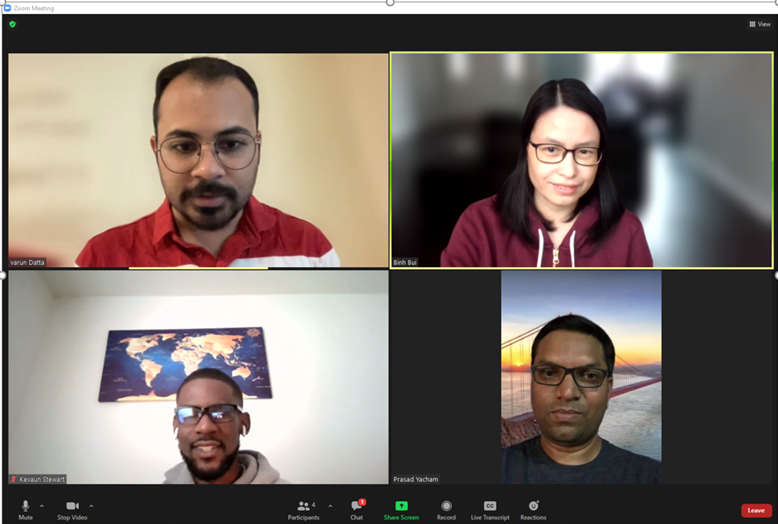

## Abstract

This project involves working on the dataset provided on Kaggle by Home Credit, a financial institution to assess and minimize the default rate for a home loan and improve the experience of customers with zero to minimal credit history.
The dataset provided has several records including the POS sales, cash loans and loans for products through online and physical distribution networks. 

In this phase, we perform text based and visual Exploratory data analysis, do some basic column/feature transformations and perform experiments using Logistic Regression with and without regularization on Numerical and categorical feature models. Mostly we use Application Train data for the analysis in this phase.

At the end, we see that the results obtained from the experiment performed by Logistic Regression with no feature engineering yield best results. Our Kaggle submission score for this phase is 0.7318. 
The idea is to improve the accuracy while keeping the model as simple as possible.


## Project Description

* __Data description__: See section *1.1 Dataset*


* __Task to be tackled__:

    - Grab and import data
    - Perform text exploratory data analysis
    - Do Visualization exploratory data analysis
    - Build the baseline pipeline model
    - Do experiments: build models with selected features (manually select relevant features), transfromations (check skewed features and transform them), and regularization (Lasso)
    - Evaluate models and discuss results


* __Workflow__: 
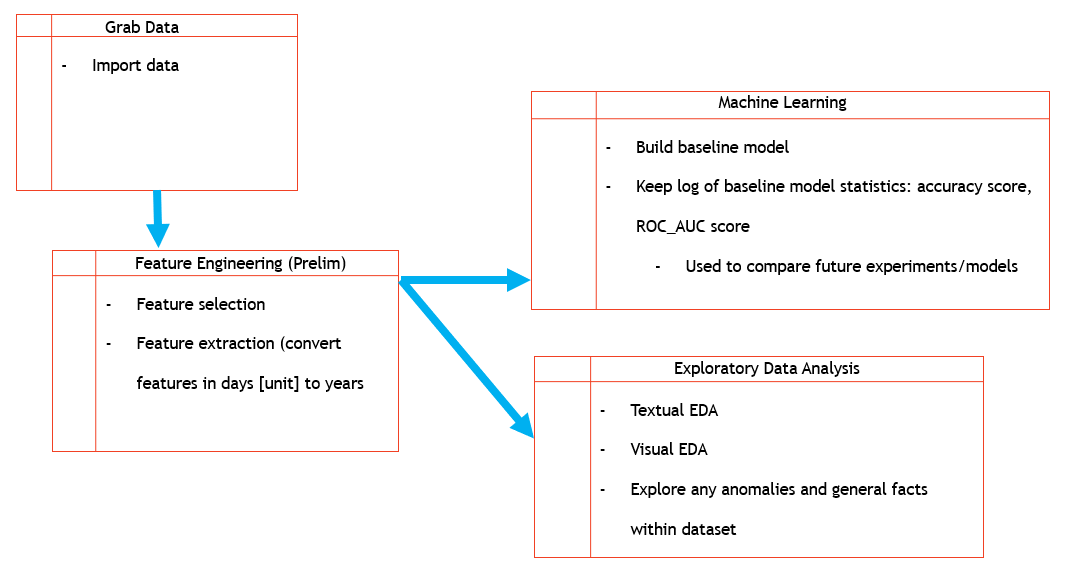

## Feature Engineering and transformers
Our goal in phase 1 is to find skewed features and transform them. We found AMT_ANNUITY column and did the log transformation.
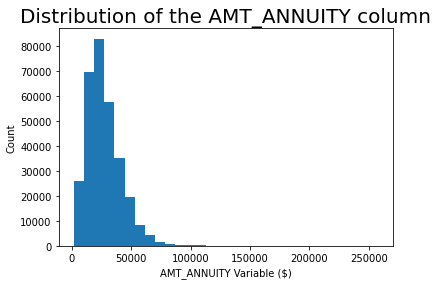

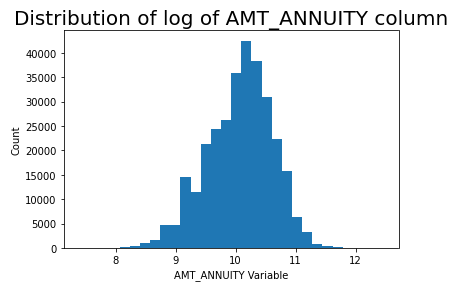


## Modeling Pipelines

In phase 1, we use binomial Logistic Regression for our pipeline models with the objective function (log loss function) as follow:

$$
\underset{\mathbf{\theta}}{\operatorname{argmin}}\left[\text{CXE}\right] = \underset{\mathbf{\theta}}{\operatorname{argmin}} \left[ -\dfrac{1}{m} \sum\limits_{i=1}^{m}{\left[ y^{(i)} log\left(\hat{p}^{(i)}\right) + (1 - y^{(i)}) log\left(1 - \hat{p}^{(i)}\right)\right]} \right] $$



Here is our pipeline diagram:

Our __all features__ has 120 raw features of application_train table except 'SK_ID_CURR', 'TARGET' features. 

The __selected features__ has 43 raw features (see section 3.3). We manually choose the features that are important for our model. We drop features that have too many missing values (the missing values more than 50%) and irrelevant features. 

The numerical and categorical features of __all features__ are demonstrated in section *3.1 Baseline model*

The numerical and categorical features of __selected features__ are demonstrated in section *3.3 Baseline model with selected features*

We do log transformation with a skewed feature, AMT_ANNUITY, and apply it in our baseline3 model.

We use baseline pipelines with numerical and categorical features. The numerical features will be standardized using StandardScaler, and we will use median value of the column to fill the missing values. The categorical features will be standardized using OneHotEncoder and the missing values will be filled by using the most frequent value along each column.

Lasso regularization is applied for the feature selection in our experiments.

*AUC_ROC score* is used to evaluate our models.

Our baseline model is the __baseline1 with all features__: 120 raw feartures.

__We have created 3 Logistic regression models:__
* Baseline1_all features 120 raw inputs
* Baseline2_selected features 43 raw inputs
* Baseline3_selected features 42 raw inputs with a log feature (log AMT_ANNUITY)

__We also do two more experiments with Lasso__ to see if we can reduce the any features: baseline4 and baseline5.


## Evaluation metric
__Area Under the Curve-Receiver Operating Characteristics (AUC-ROC) score__ will be used to evaluate the accuracy of various logistic regression models (based on varying hyperparameters and thresholds). The AUC score represents the area under the ROC graph. The ROC graph represents a plot of the True Positive Rate (TPR) versus the False Positive Rate (FPR) – where each point on the graph represents a different logistic regression model. The higher the AUC-ROC score, the better. TPR and FPR are defined in equations 1 and 2, respectively.  

__Equation 1:__

*True Positive Rate, TPR = True Positives / (True Positives + False Negatives)*

Where: 

    True Positives = samples accurately classified as class 1 (class 1 = will default on loan) 

    False Negatives = samples incorrectly classified as class 0 (class 0 = will not default on loan) 

__Equation 2:__

*False Positive Rate, FPR = False Positives / (True Negatives + False Positives)* 

Where: 

    False Positives = samples incorrectly classified as class 1 

    True Negatives = samples accurately classified as class 0 


## Experimental results

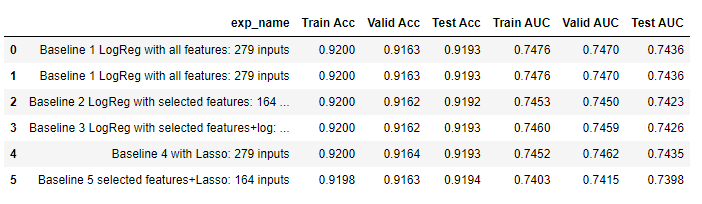

## Kaggle Submission

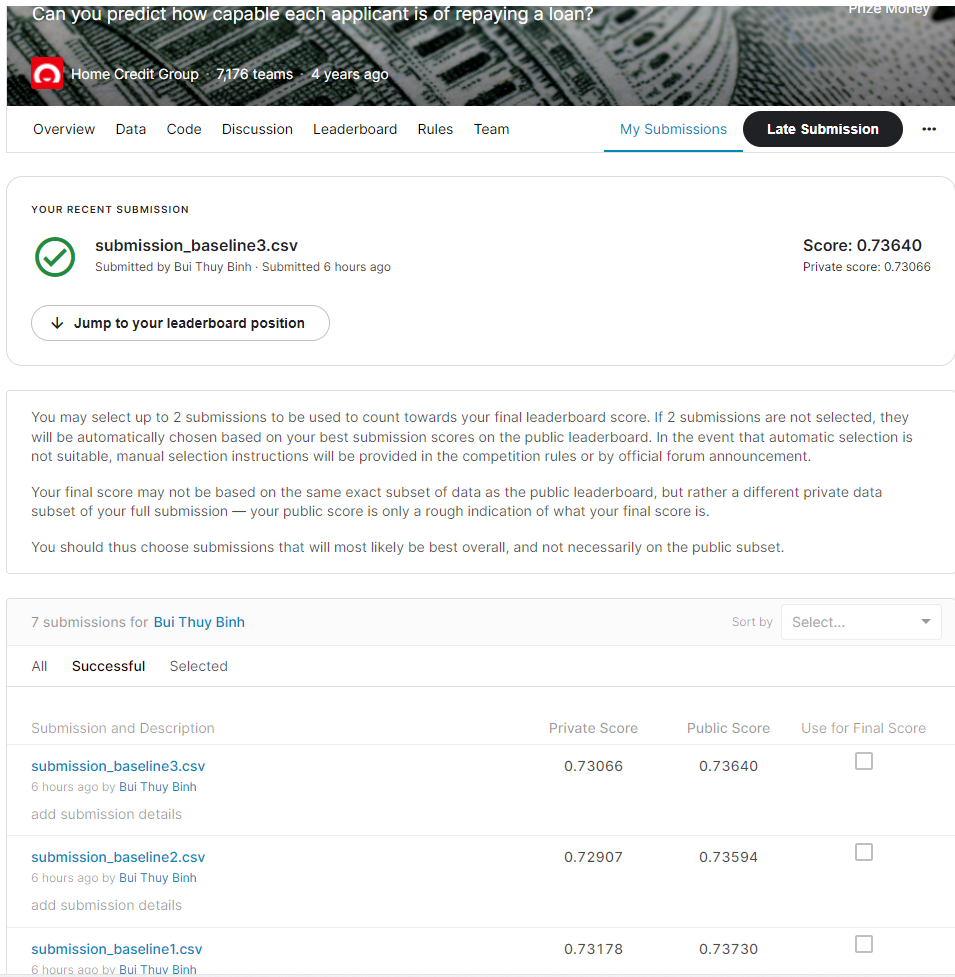

## Discussion
__We have created 3 Logistic regression models:__
* Baseline1_all features 120 raw inputs
* Baseline2_selected features 43 raw inputs
* Baseline3_selected features 42 raw inputs with a log feature (log AMT_ANNUITY)

The train AUC, Valid AUC, and Test AUC of the baseline 1 are hihgest among the three models.

After we do the log transformation for AMT_ANNUITY column, we apply it with selected features (see Baseline 3). The train AUC, Valid AUC, and Test AUC of the baseline 3 is better than the ones of baseline 2.

__We also do two more experiments with Lasso__ to see if we can reduce the any features:

* Baseline4 with Lasso and all features (See the result of coefficient array of baseline4 in *section 5.1*): we do not see any zero coefficient. The train AUC, Valid AUC, and Test AUC of the baseline 4 is not better than the ones of baseline 1 
* Baseline5 with Lasso and selected features (See the result of coefficient array of baseline5 in *section 5.2*): we do not see zero coefficients. The train AUC, Valid AUC, and Test AUC of the baseline 4 is not better than the ones of the four baseline models. 

__Kaggle Submission:__

We create Kaggle submission file based on baseline1, baseline2, and baseline3. The submission of baseline1 has the highest public and private scores which are 0.7318 and 0.7373.

__Overall:__

With all our experiments we have created, baseline1 has the highest test AUC in our notebook (0.7436) as well as Kaggle score (0.7319).
Although baseline1 recieves highest result, it look similar with the other 4 experiments in the Test AUC scores which is around 0.74 (notebook result).

## Conclusion

In this phase we have understood the dataset by performing textual EDA and Visual EDA where we have checked for the relationship between Target variable and categorical features and also checked for the missing values in each features, 

Later we have build 5 modeling pipelines using logistic regression and we have compared all the training and testing accuracies to see which pipeline works best.

Our aim in this phase is to achieve best accuracy and also decrease the false positives and false negatives.

The baseline1 model has the highest test AUC score both in the notebook (0.7436) and in Kaggle submission (0.73178).

The 5 experiments yielded similar Test AUC scores, around 0.74. Dropping features and Lasso regularization does not help in predicting the target variable based on our experiments. Log transformation a feature has improved our model a little bit.
We hope for a better score by doing more feature engineering in the next phase.

For the next phase, we will be performing feature engineering on all the data sets to find the important features, perform dimensionality reduction, SVC, Grid search and perform feature engineering.